### Plot Gen information for boosted tau massregression sample 

In [1]:
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import candidate
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import json
import hist
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)



Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ov790u8p because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='../analysis_run3/AN_Note_Plot/Inference_on_root_file'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

In [216]:
class MyProcessor(processor.ProcessorABC):
    def __init__(self):
        pass
    

    def process(self, events):
        # print(events.jetadR)
        # dataset_axis = hist.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")
        # dR_axis = hist.axis.Regular(10, 0, 0.5, name="dR", label="Jet A dR")
        dataset = events.metadata['dataset']
        # print("jetE--------------------",events.jetE)
        # print("Shape of TaudR:", ak.type(events.TaudR))
        # print("Shape of mass_A1:", ak.type(events.mass_A1[:,0]))
        # print("Shape of mass_A2:", ak.type(events.mass_A2[:, 1]))
        jet = ak.zip(
            {
                # "GenA1_inv":events.GenA1_inv,
                # "dR_A1_Tau1":events.dR_A1_Tau1,
                # "dR_A1_Tau2":events.dR_A1_Tau2,
                # "dR_Tau1_Tau2":events.dR_Tau1_Tau2,
                # "A1_pt": events.A1_pt,
                # "Tau1_pt": events.Tau1_pt,
                # "Tau2_pt":events.Tau2_pt,
                # "A1_eta":events.A1_eta,
                # "Tau1_eta":events.Tau1_eta,
                # "Tau2_eta":events.Tau2_eta,
                # "A1_phi": events.A1_phi,
                # "Tau1_phi":events.Tau1_phi,
                # "Tau2_phi":events.Tau2_phi,
                # "Tau1_Tau2_dphi": events.Tau1_Tau2_dphi,
                # "Tau1_Tau2_deta": events.Tau1_Tau2_deta,
                # "TaudR":events.TaudR,
                "mass_A1":events.mass_A1,
                "mass_A2":events.mass_A2,
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        
        
#         amass = jet.GenA1_inv[jet.GenA1_inv > -22.22]
        
#         apt = jet.A1_pt[jet.A1_pt>-22.22]
#         aeta = jet.A1_eta[jet.A1_eta>-22.22]
#         aphi = jet.A1_phi[jet.A1_phi>-22.22]
#         tau1pt = jet.Tau1_pt[jet.Tau1_pt>-22.22]
#         tau1eta = jet.Tau1_eta[jet.Tau1_eta>-22.22]
#         tau1phi = jet.Tau1_phi[jet.Tau1_phi>-22.22]
#         tau2pt = jet.Tau2_pt[jet.Tau2_pt>-22.22]
#         tau2eta = jet.Tau2_eta[jet.Tau2_eta>-22.22]
#         tau2phi = jet.Tau2_phi[jet.Tau2_phi>-22.22]
#         tau1dr = jet.dR_A1_Tau1[jet.dR_A1_Tau1>-22.22]
#         tau2dr = jet.dR_A1_Tau2[jet.dR_A1_Tau2>-22.22]
#         taudr = jet.dR_Tau1_Tau2[jet.dR_Tau1_Tau2>-22.22]
#         dphi = jet.Tau1_Tau2_dphi[jet.Tau1_Tau2_dphi > -22.22]
#         deta = jet.Tau1_Tau2_deta[jet.Tau1_Tau2_deta > -22.22]

        
        # a1masslow = jet.mass_A1[(jet.mass_A1 > -99.99) & (jet.TaudR <= 0.4)]
        # a1masshigh = jet.mass_A1[(jet.mass_A1 > -99.99) & (jet.TaudR > 0.4)]
        a1mass = jet.mass_A1[jet.mass_A1 > -99.99]
        a2mass = jet.mass_A2[jet.mass_A2 > -99.99]
        amass = np.concatenate((a1mass, a2mass), axis=0)
        
        
#         # A mass  -----------------------------------------------------------
        
#         A_mass = (
#             hist.Hist.new
#             .StrCat(["A mass"], name="hmassa")
#             .Reg(36, 3.2, 17.2, name="massa", label="Mass [GeV]")
#             .Int64()
#         )
#         A_mass.fill(hmassa="A mass", massa=amass)


#         # A pt  -----------------------------------------------------------
        
#         A_pt = (
#             hist.Hist.new
#             .StrCat([ "A_pt"], name="hapt")
#             .Reg(50, 10, 300, name="pt_a", label="pT [GeV]")
#             .Int64()
#         )
        
#         A_pt.fill(hapt="A_pt", pt_a=apt)
#         # A eta -----------------------------------------------------------
        
#         A_eta = (
#             hist.Hist.new
#             .StrCat([ "A_eta"], name="haeta")
#             .Reg(10, -5, 5, name="eta_a", label="eta")
#             .Int64()
#         )
        
#         A_eta.fill(haeta="A_eta", eta_a=aeta)
       
#         # A phi -----------------------------------------------------------
        
#         A_phi = (
#             hist.Hist.new
#             .StrCat([ "A_phi"], name="haphi")
#             .Reg(10, -3.2, 3.2, name="phi_a", label="phi")
#             .Int64()
#         )
        
#         A_phi.fill(haphi="A_phi", phi_a=aphi)
        
#         # gen Tau1 pt -----------------------------------------------------------
        
#         Tau1_pt = (
#             hist.Hist.new
#             .StrCat([ "Tau1_pt"], name="htau1pt")
#             .Reg(19, 10, 200, name="pt_tau1", label="pT [GeV]")
#             .Int64()
#         )
        
#         Tau1_pt.fill(htau1pt="Tau1_pt", pt_tau1=tau1pt)
        
#         # gen Tau1 eta -----------------------------------------------------------
        
#         Tau1_eta = (
#             hist.Hist.new
#             .StrCat([ "Tau1_eta"], name="htau1eta")
#             .Reg(10, -5, 5, name="eta_tau1", label="Eta")
#             .Int64()
#         )
        
#         Tau1_eta.fill(htau1eta="Tau1_eta", eta_tau1=tau1eta)
        
#         # gen Tau1 phi -----------------------------------------------------------
        
#         Tau1_phi = (
#             hist.Hist.new
#             .StrCat([ "Tau1_phi"], name="htau1phi")
#             .Reg(10, -3.2, 3.2, name="phi_tau1", label="Phi")
#             .Int64()
#         )
        
#         Tau1_phi.fill(htau1phi="Tau1_phi", phi_tau1=tau1phi)
        
#         # gen Tau2 pt -----------------------------------------------------------
        
#         Tau2_pt = (
#             hist.Hist.new
#             .StrCat([ "Tau2_pt"], name="htau2pt")
#             .Reg(19, 10, 200, name="pt_tau2", label="pT [GeV]")
#             .Int64()
#         )
        
#         Tau2_pt.fill(htau2pt="Tau2_pt", pt_tau2=tau2pt)
        
#        # gen Tau1 eta -----------------------------------------------------------
        
#         Tau2_eta = (
#             hist.Hist.new
#             .StrCat([ "Tau2_eta"], name="htau2eta")
#             .Reg(10, -5, 5, name="eta_tau2", label="Eta")
#             .Int64()
#         )
        
#         Tau2_eta.fill(htau2eta="Tau2_eta", eta_tau2=tau2eta)
        
#         # gen Tau1 phi -----------------------------------------------------------
        
#         Tau2_phi = (
#             hist.Hist.new
#             .StrCat([ "Tau2_phi"], name="htau2phi")
#             .Reg(10, -3.2, 3.2, name="phi_tau2", label="Phi")
#             .Int64()
#         )
        
#         Tau2_phi.fill(htau2phi="Tau2_phi", phi_tau2=tau2phi)
        
        
        
        
#         # gen tau1 A dR -----------------------------------------------------------
        
#         tau1_A_dR = (
#             hist.Hist.new
#             .StrCat(["tau1_A_dr"], name="htau1jetdR")
#             .Reg(10, 0.0, 0.5, name="tau1jetdr", label="dR")
#             .Int64()
#         )
#         tau1_A_dR.fill(htau1jetdR="tau1_A_dr", tau1jetdr=tau1dr)
        
#         # gen tau2 A dR -----------------------------------------------------------
        
#         tau2_A_dR = (
#             hist.Hist.new
#             .StrCat(["tau2_A_dr"], name="htau2jetdR")
#             .Reg(10, 0.0, 0.5, name="tau2jetdr", label="dR")
#             .Int64()
#         )
#         tau2_A_dR.fill(htau2jetdR="tau2_A_dr", tau2jetdr=tau2dr)
        
        
#         #gen tau1 tau2 dR -----------------------------------------------------------
        
#         taus_dR = (
#             hist.Hist.new
#             .StrCat(["taus_dr"], name="htausdR")
#             .Reg(10, 0.0, 0.5, name="tau_tau_dr", label="dR")
#             .Int64()
#         )
#         taus_dR.fill(htausdR="taus_dr", tau_tau_dr=taudr)
        
#         #A mass and pt 2D hist
        
# #         A_mass_pt = (
# #             hist.Hist.new
# #             .StrCat(["A"], name="category")
# #             .Reg(36, 3.2, 17.2, name="massa", label="Mass [GeV]")
# #             .Reg(50, 10, 300, name="pt_a", label="pT [GeV]").Int64()
# #         )
# #         A_mass_pt.fill(category="A",massa=amass, pt_a=apt)
        
        
#         A_mass_pt = (
#             hist.Hist.new
            
#             .Reg(36, 3.2, 17.2, name="massa", label="Mass [GeV]")
#             .Reg(38, 10, 200, name="pt_a", label="pT [GeV]").Int64()
#         )
#         A_mass_pt.fill(massa=amass, pt_a=apt)

#         A1_masslow = (
#             hist.Hist.new
#             .StrCat(["A1 mass"], name="hmassa1low")
#             .Reg(44, 0, 17.2, name="massa1low", label="Mass [GeV]")
#             .Int64()
#         )
#         A1_masslow.fill(hmassa1="A1 mass", massa1low=a1masslow)

        
#         A1_masshigh = (
#             hist.Hist.new
#             .StrCat(["A1 mass"], name="hmassa1high")
#             .Reg(44, 0, 17.2, name="massa1high", label="Mass [GeV]")
#             .Int64()
#         )
#         A1_masshigh.fill(hmassa1="A1 mass", massa1high=a1masshigh)

        A_mass = (
            hist.Hist.new
            .StrCat(["A mass"], name="hmassa")
            .Reg(44, 0, 17.2, name="massa", label="Mass [GeV]")
            .Int64()
        )
        A_mass.fill(hmassa="A mass", massa=amass)
        
        # A1 mass  -----------------------------------------------------------
        
        A1_mass = (
            hist.Hist.new
            .StrCat(["A1 mass"], name="hmassa1")
            .Reg(44, 0, 17.2, name="massa1", label="Mass [GeV]")
            .Int64()
        )
        A1_mass.fill(hmassa1="A1 mass", massa1=a1mass)
        
        # A2 mass  -----------------------------------------------------------
        
        A2_mass = (
            hist.Hist.new
            .StrCat(["A2 mass"], name="hmassa2")
            .Reg(44, 0, 17.2, name="massa2", label="Mass [GeV]")
            .Int64()
        )
        A2_mass.fill(hmassa2="A2 mass", massa2=a2mass)

        # 2D mass spectrum
        A1_A2_mass = (
            hist.Hist.new
            
            .Reg(44, 0, 17.2, name="massa1", label="A1 [GeV]")
            .Reg(44, 0, 17.2, name="massa2", label="A2 [GeV]").Int64()
        )
        A1_A2_mass.fill(massa1=a1mass, massa2=a2mass)


        
        #----------------------------------------------------------------------------------
        
       
        
        
        
        return {
            dataset: {
                "entries": len(events),

#                 "a_mass":A_mass,
                
#                 "a_pt":A_pt,
#                 "a_eta":A_eta,
#                 "a_phi":A_phi,
#                 "tau1_pt":Tau1_pt,
#                 "tau1_eta":Tau1_eta,
#                 "tau1_phi":Tau1_phi,
#                 "tau2_pt":Tau2_pt,
#                 "tau2_eta":Tau2_eta,
#                 "tau2_phi":Tau2_phi,
#                 "tau1_A_dr":tau1_A_dR,
#                 "tau2_A_dr":tau2_A_dR,
#                 "taus_dr":taus_dR,
#                 "a_mass_pt":A_mass_pt,
                "A1_mass":A1_mass,
                "A2_mass":A2_mass,
                "A1_A2_mass": A1_A2_mass,
                "A_mass":A_mass,
                
               
                
              
               
            }
        }

    def postprocess(self, accumulator):
        pass

In [343]:
with open("inference_signal_3p7_GeV.json", "r") as fin:
    file_list_train1 = json.load(fin) 
with open("inference_signal_14_GeV.json", "r") as fin:
    file_list_train2 = json.load(fin) 

fileset = {
    'train_dataset_1': file_list_train1
    ,'train_dataset_2': file_list_train2
                  
}
print(len(fileset["train_dataset_1"]), len(fileset["train_dataset_2"]))

64 74


In [344]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=10),
    schema=BaseSchema,
    # maxchunks=5,
)

out = futures_run(
    fileset,
    treename='/fevt/RHTree',
    processor_instance=MyProcessor()
)
# Save the 'out' object to a file
# with open('inference_signal_3p7GeV.pkl', 'wb') as f:
#     pickle.dump(out, f)

# print("inference_signal_3p7GeV.pkl")

with open('inference_signal.pkl', 'wb') as f:
    pickle.dump(out, f)

print("inference_signal.pkl")

Output()

Output()

inference_signal.pkl


In [345]:
with open('inference_signal.pkl', 'rb') as f:
    out = pickle.load(f)

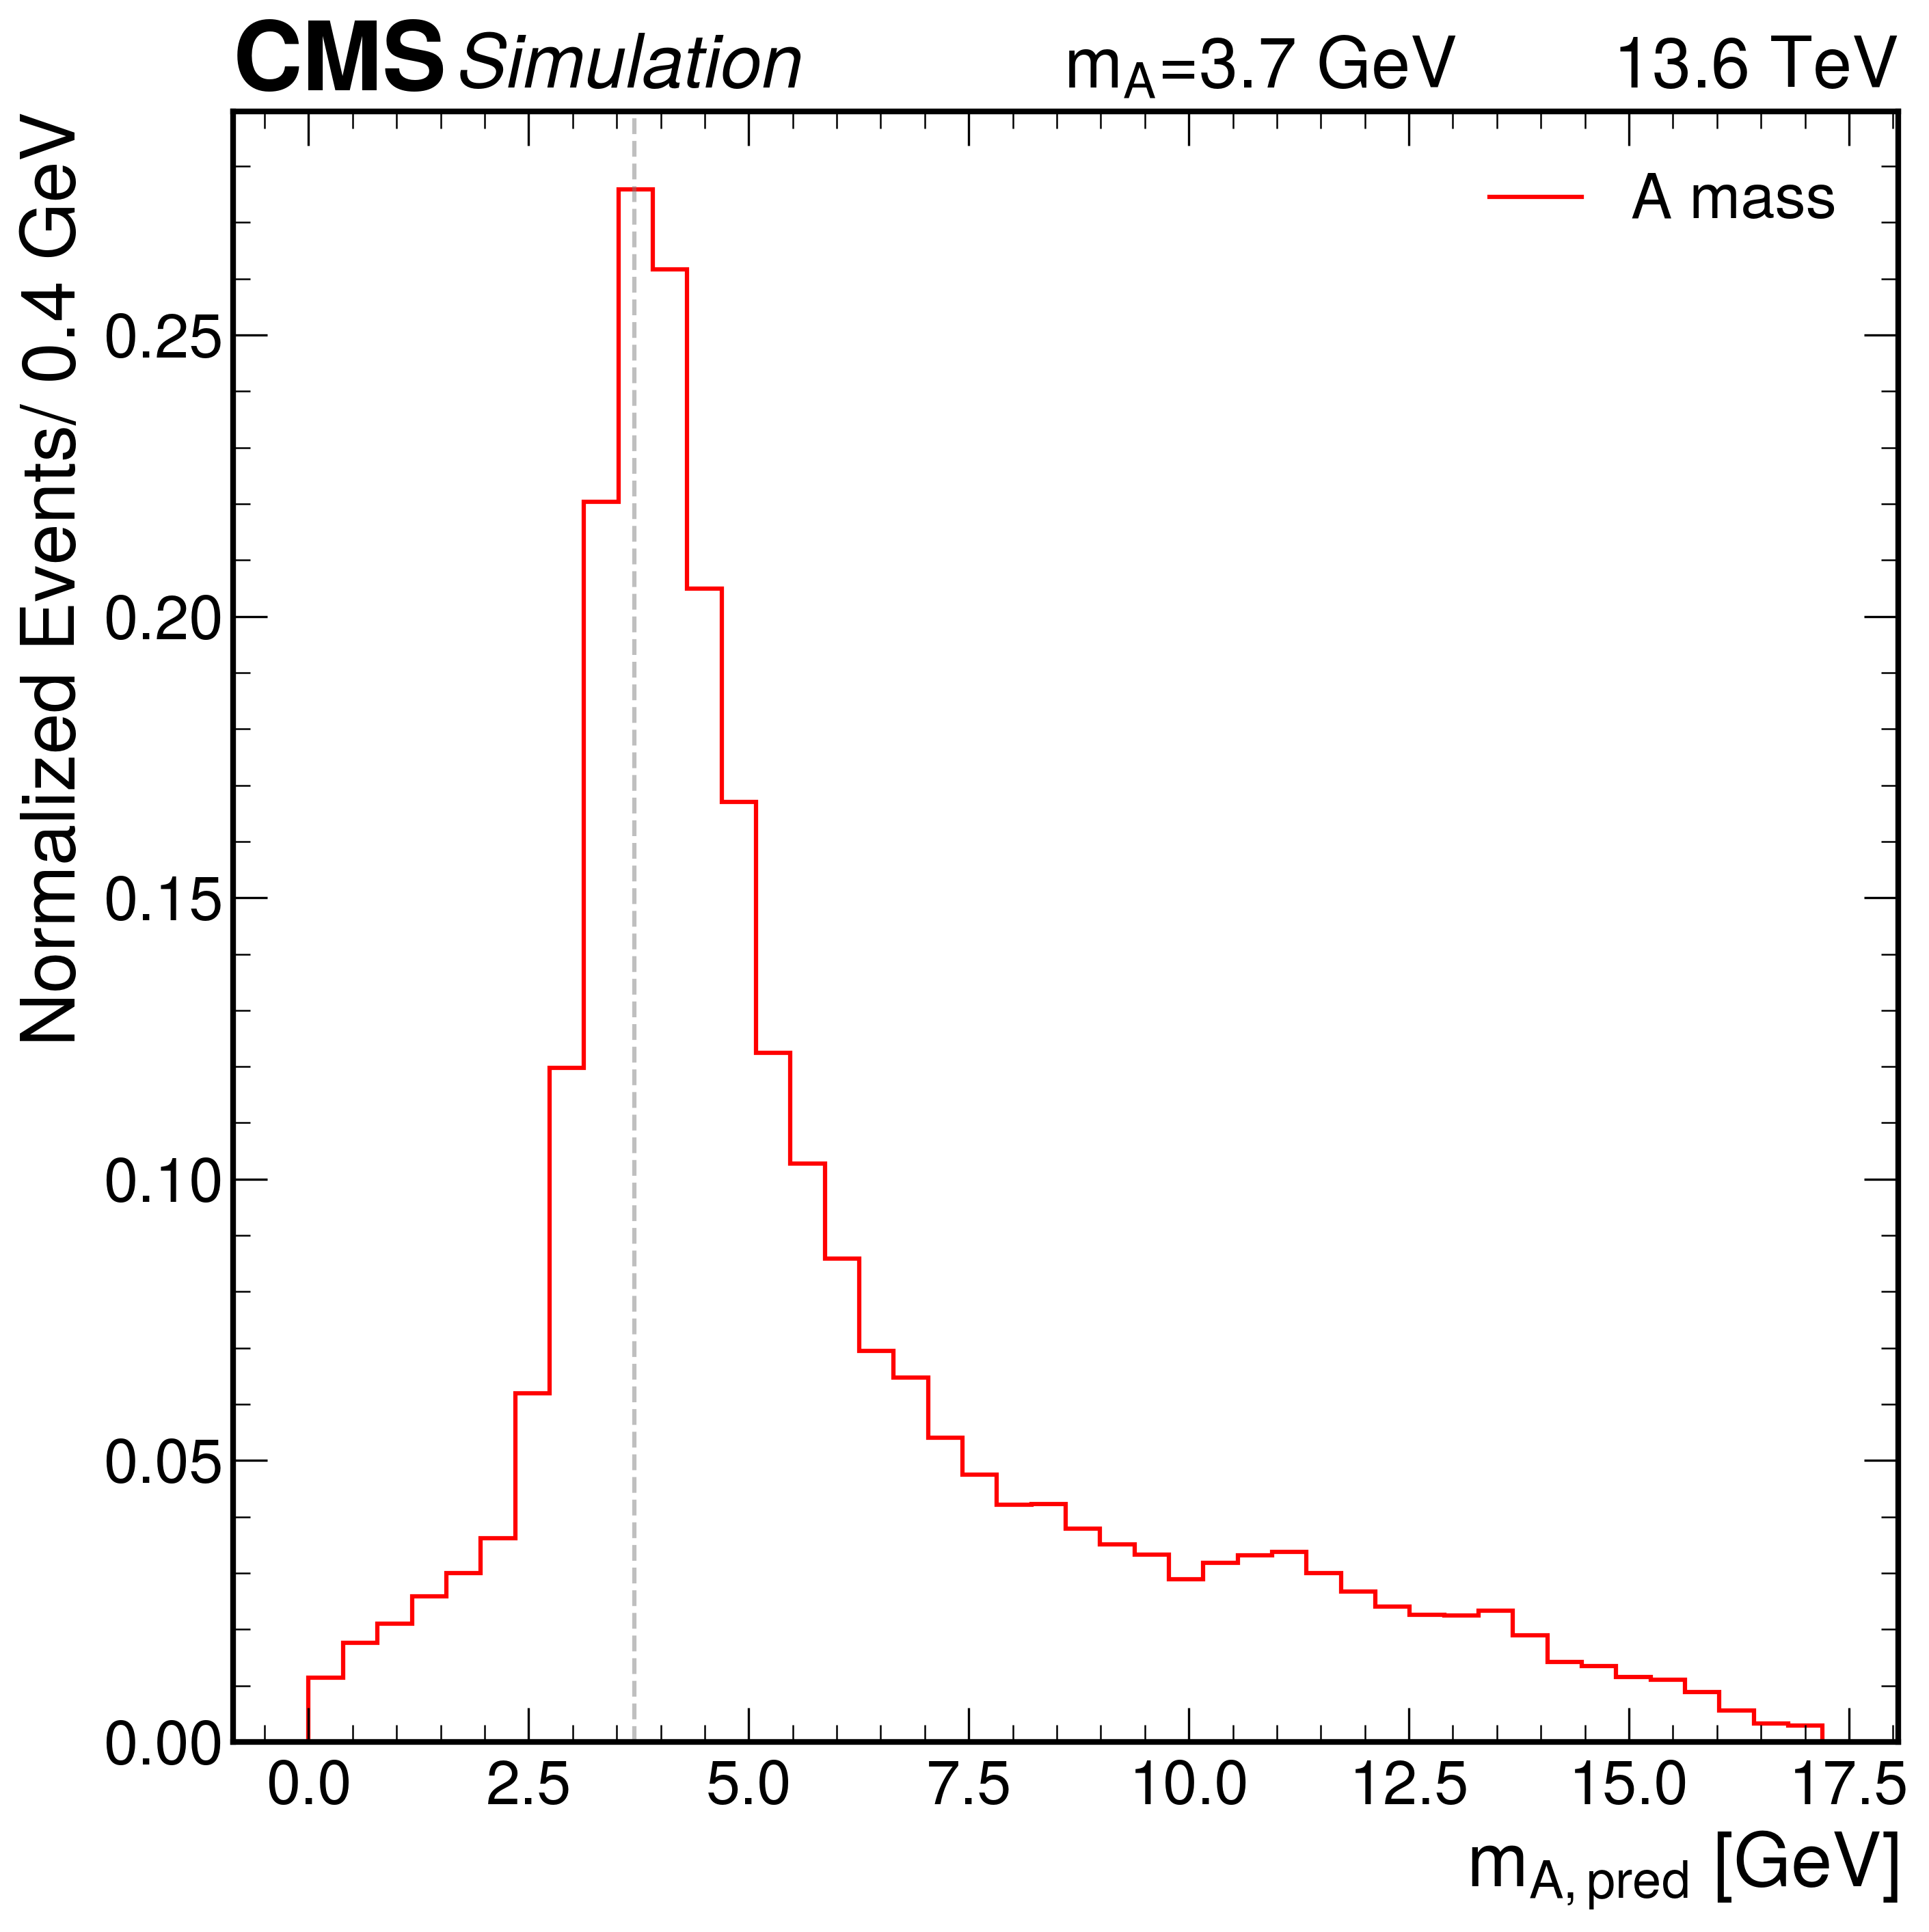

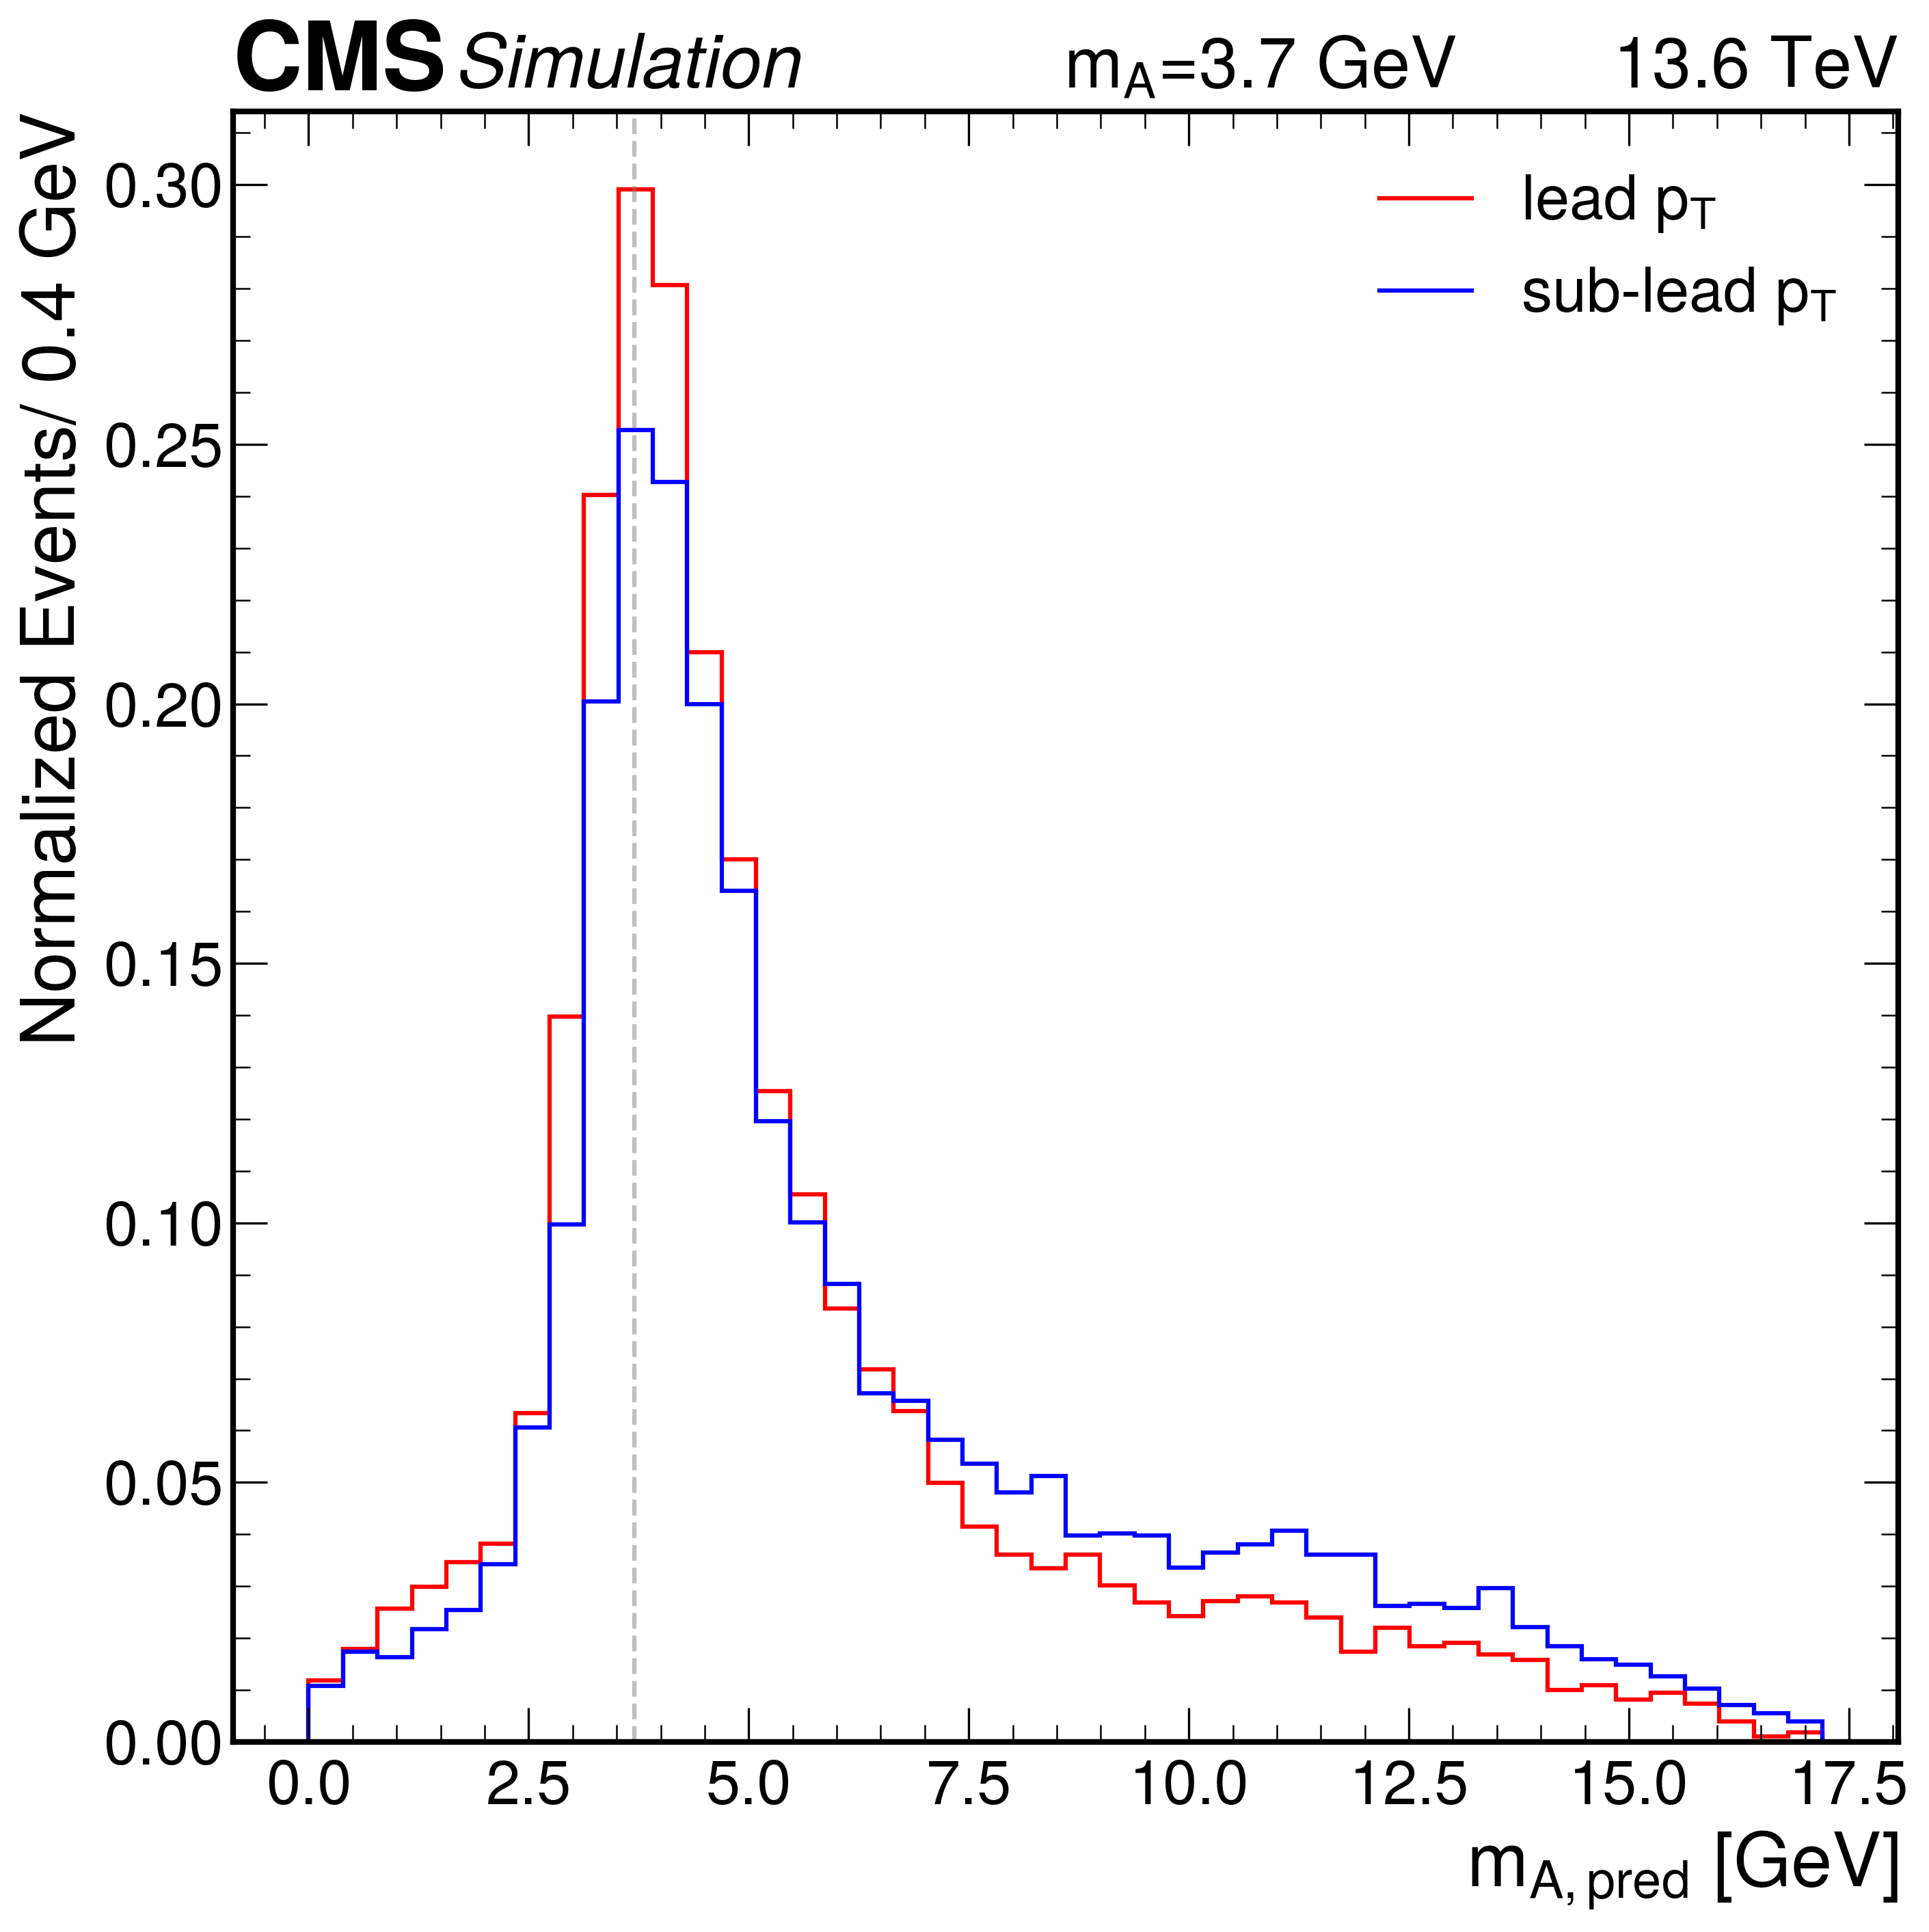

In [350]:
fig, ax = plt.subplots(dpi=300)
out["train_dataset_1"]["A_mass"].plot1d(ax=ax,histtype='step',color="r", density=True)
ax.axvline(x=3.7, color="grey", linestyle="--", alpha=0.5)
ax.set_xlabel(r"$m_{A, pred}$ [GeV]")
ax.set_ylabel("Normalized Events/ 0.4 GeV")
hep.cms.label(llabel="Simulation ", rlabel= r"$m_A$=3.7 GeV  " +"      13.6 TeV", loc=0, ax=ax)
ax.legend()
plt.tight_layout()
# plt.savefig(f'{out_dir}/A_mass_plots_signal_mass_3p7.pdf',facecolor='w',dpi=300)



fig, ax = plt.subplots(dpi=300)
out["train_dataset_1"]["A1_mass"].plot1d(ax=ax,histtype='step',color="r", label=r'lead $p_T$', density=True)
out["train_dataset_1"]["A2_mass"].plot1d(ax=ax,histtype='step',color="b", label=r'sub-lead $p_T$', density=True)
ax.axvline(x=3.7, color="grey", linestyle="--", alpha=0.5)
ax.set_xlabel(r"$m_{A, pred}$ [GeV]")
ax.set_ylabel("Normalized Events/ 0.4 GeV")
hep.cms.label(llabel="Simulation ", rlabel= r"$m_A$=3.7 GeV  " +"      13.6 TeV", loc=0, ax=ax)
ax.legend()
plt.tight_layout()
plt.savefig(f'{out_dir}/leading_subleading_A1_A2_plots_signal_mass_3p7.pdf',facecolor='w',dpi=300)

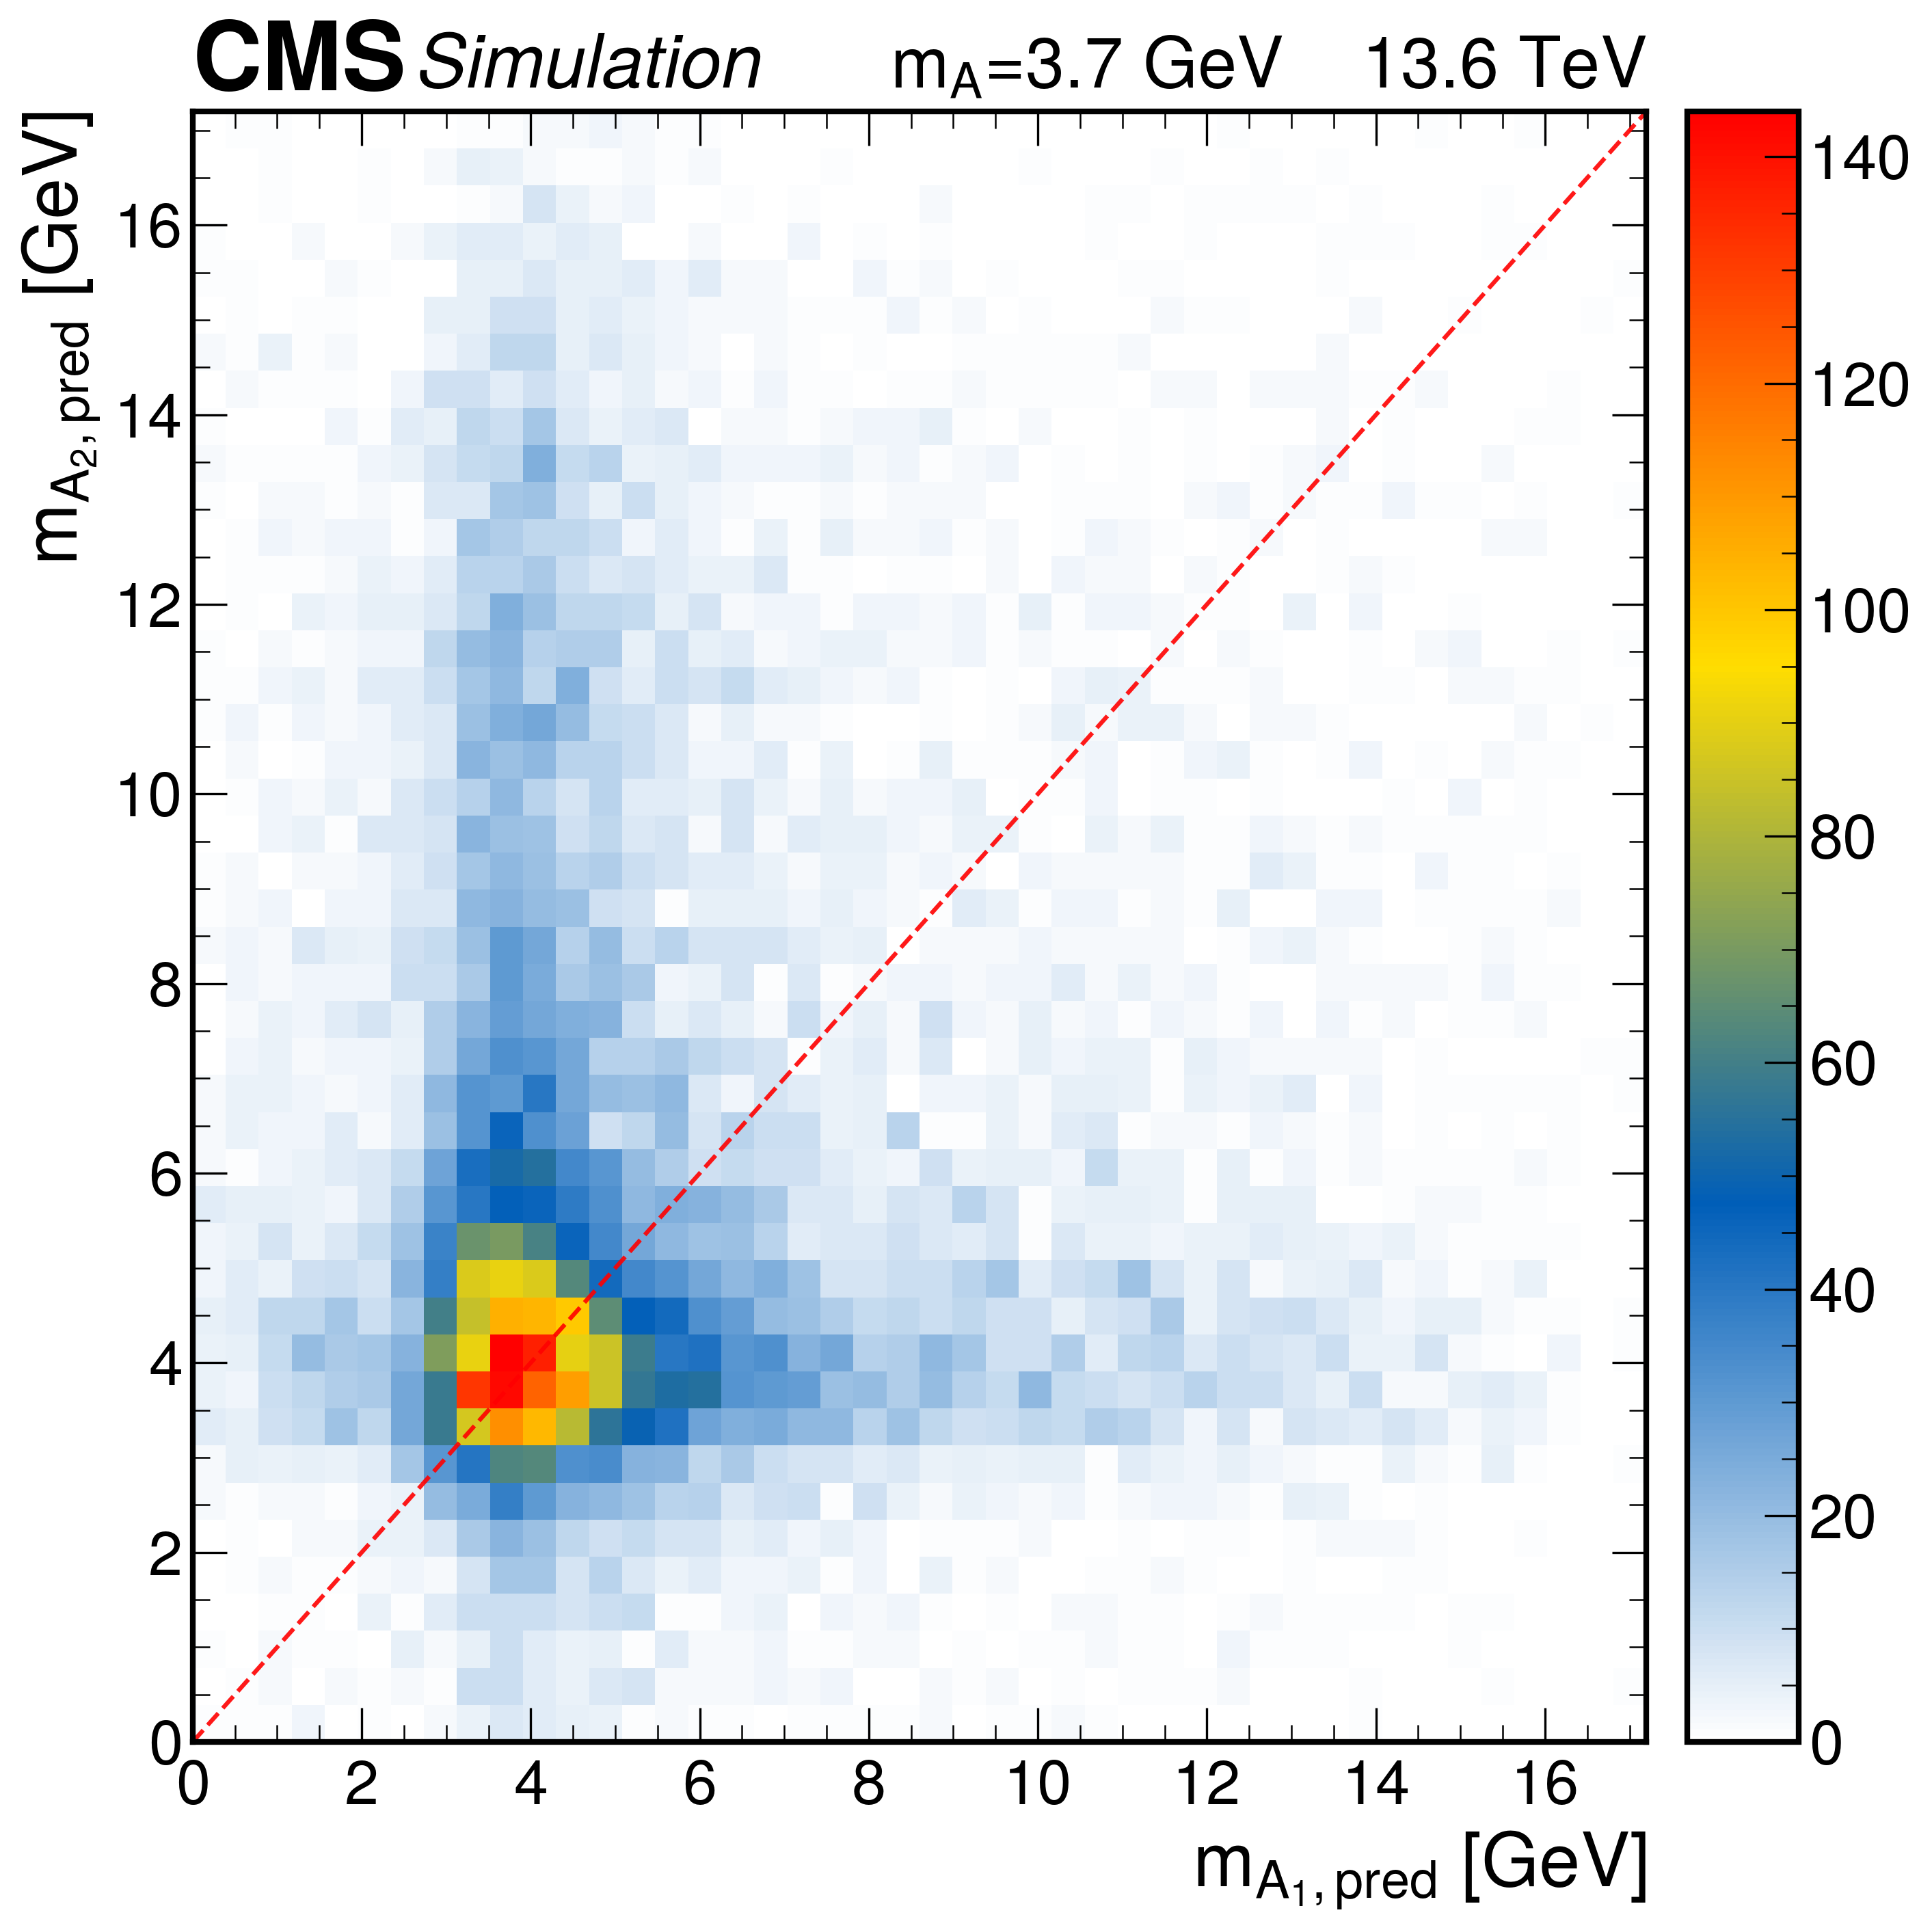

In [351]:
fig, ax = plt.subplots(dpi=300)
# norm = mcolors.TwoSlopeNorm(vmin=0, vmax=2000, vcenter=500)
out["train_dataset_1"]["A1_A2_mass"].plot2d(ax=ax, cmap=cms_cmap)
ax.set_xlabel(r"$m_{A_1, pred}$ [GeV]")
ax.set_ylabel(r"$m_{A_2, pred}$ [GeV]")  # Note: you had set_xlabel twice, should be set_ylabel here
hep.cms.label(llabel="Simulation   ", rlabel= r"$m_A$=3.7 GeV  " +"  13.6 TeV", loc=0, ax=ax)
plt.plot((0, 22.1-0.4), (0, 22.1-0.4), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(0,17.3,2))
plt.tight_layout()
plt.savefig(f'{out_dir}/leading_subleading_A1_A2_2dplots_signal_mass_3p7.pdf',facecolor='w',dpi=300)

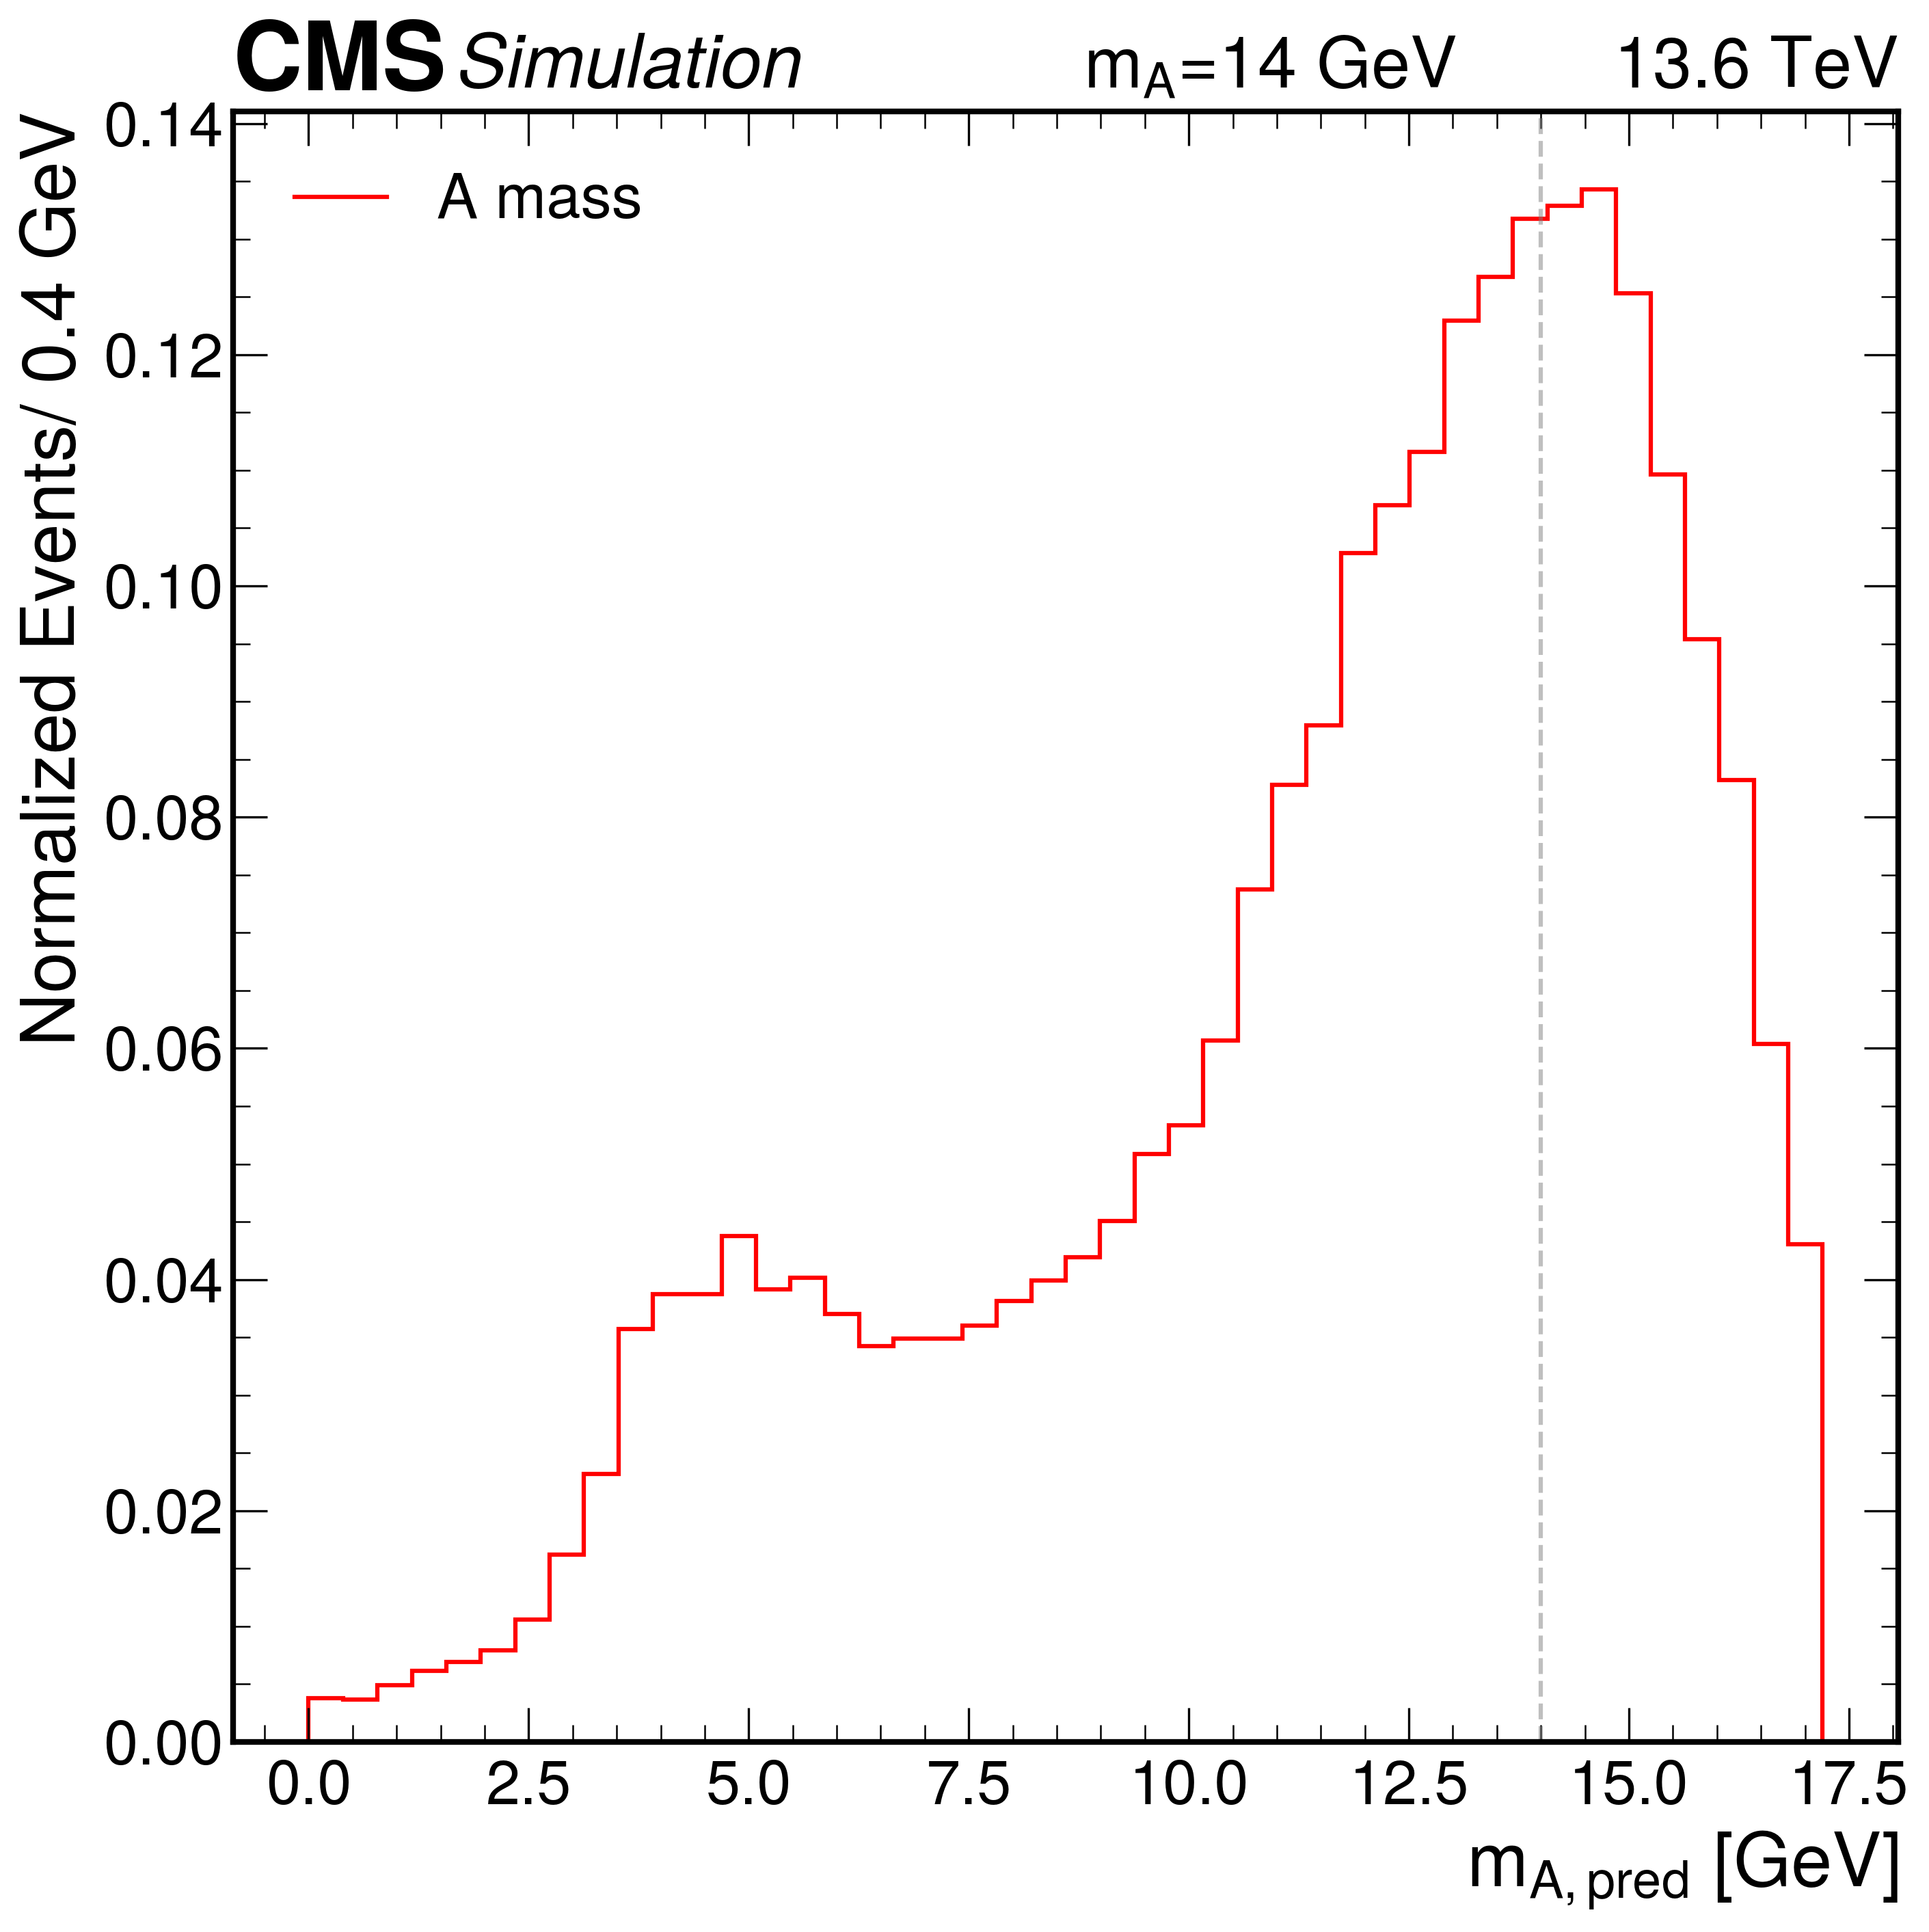

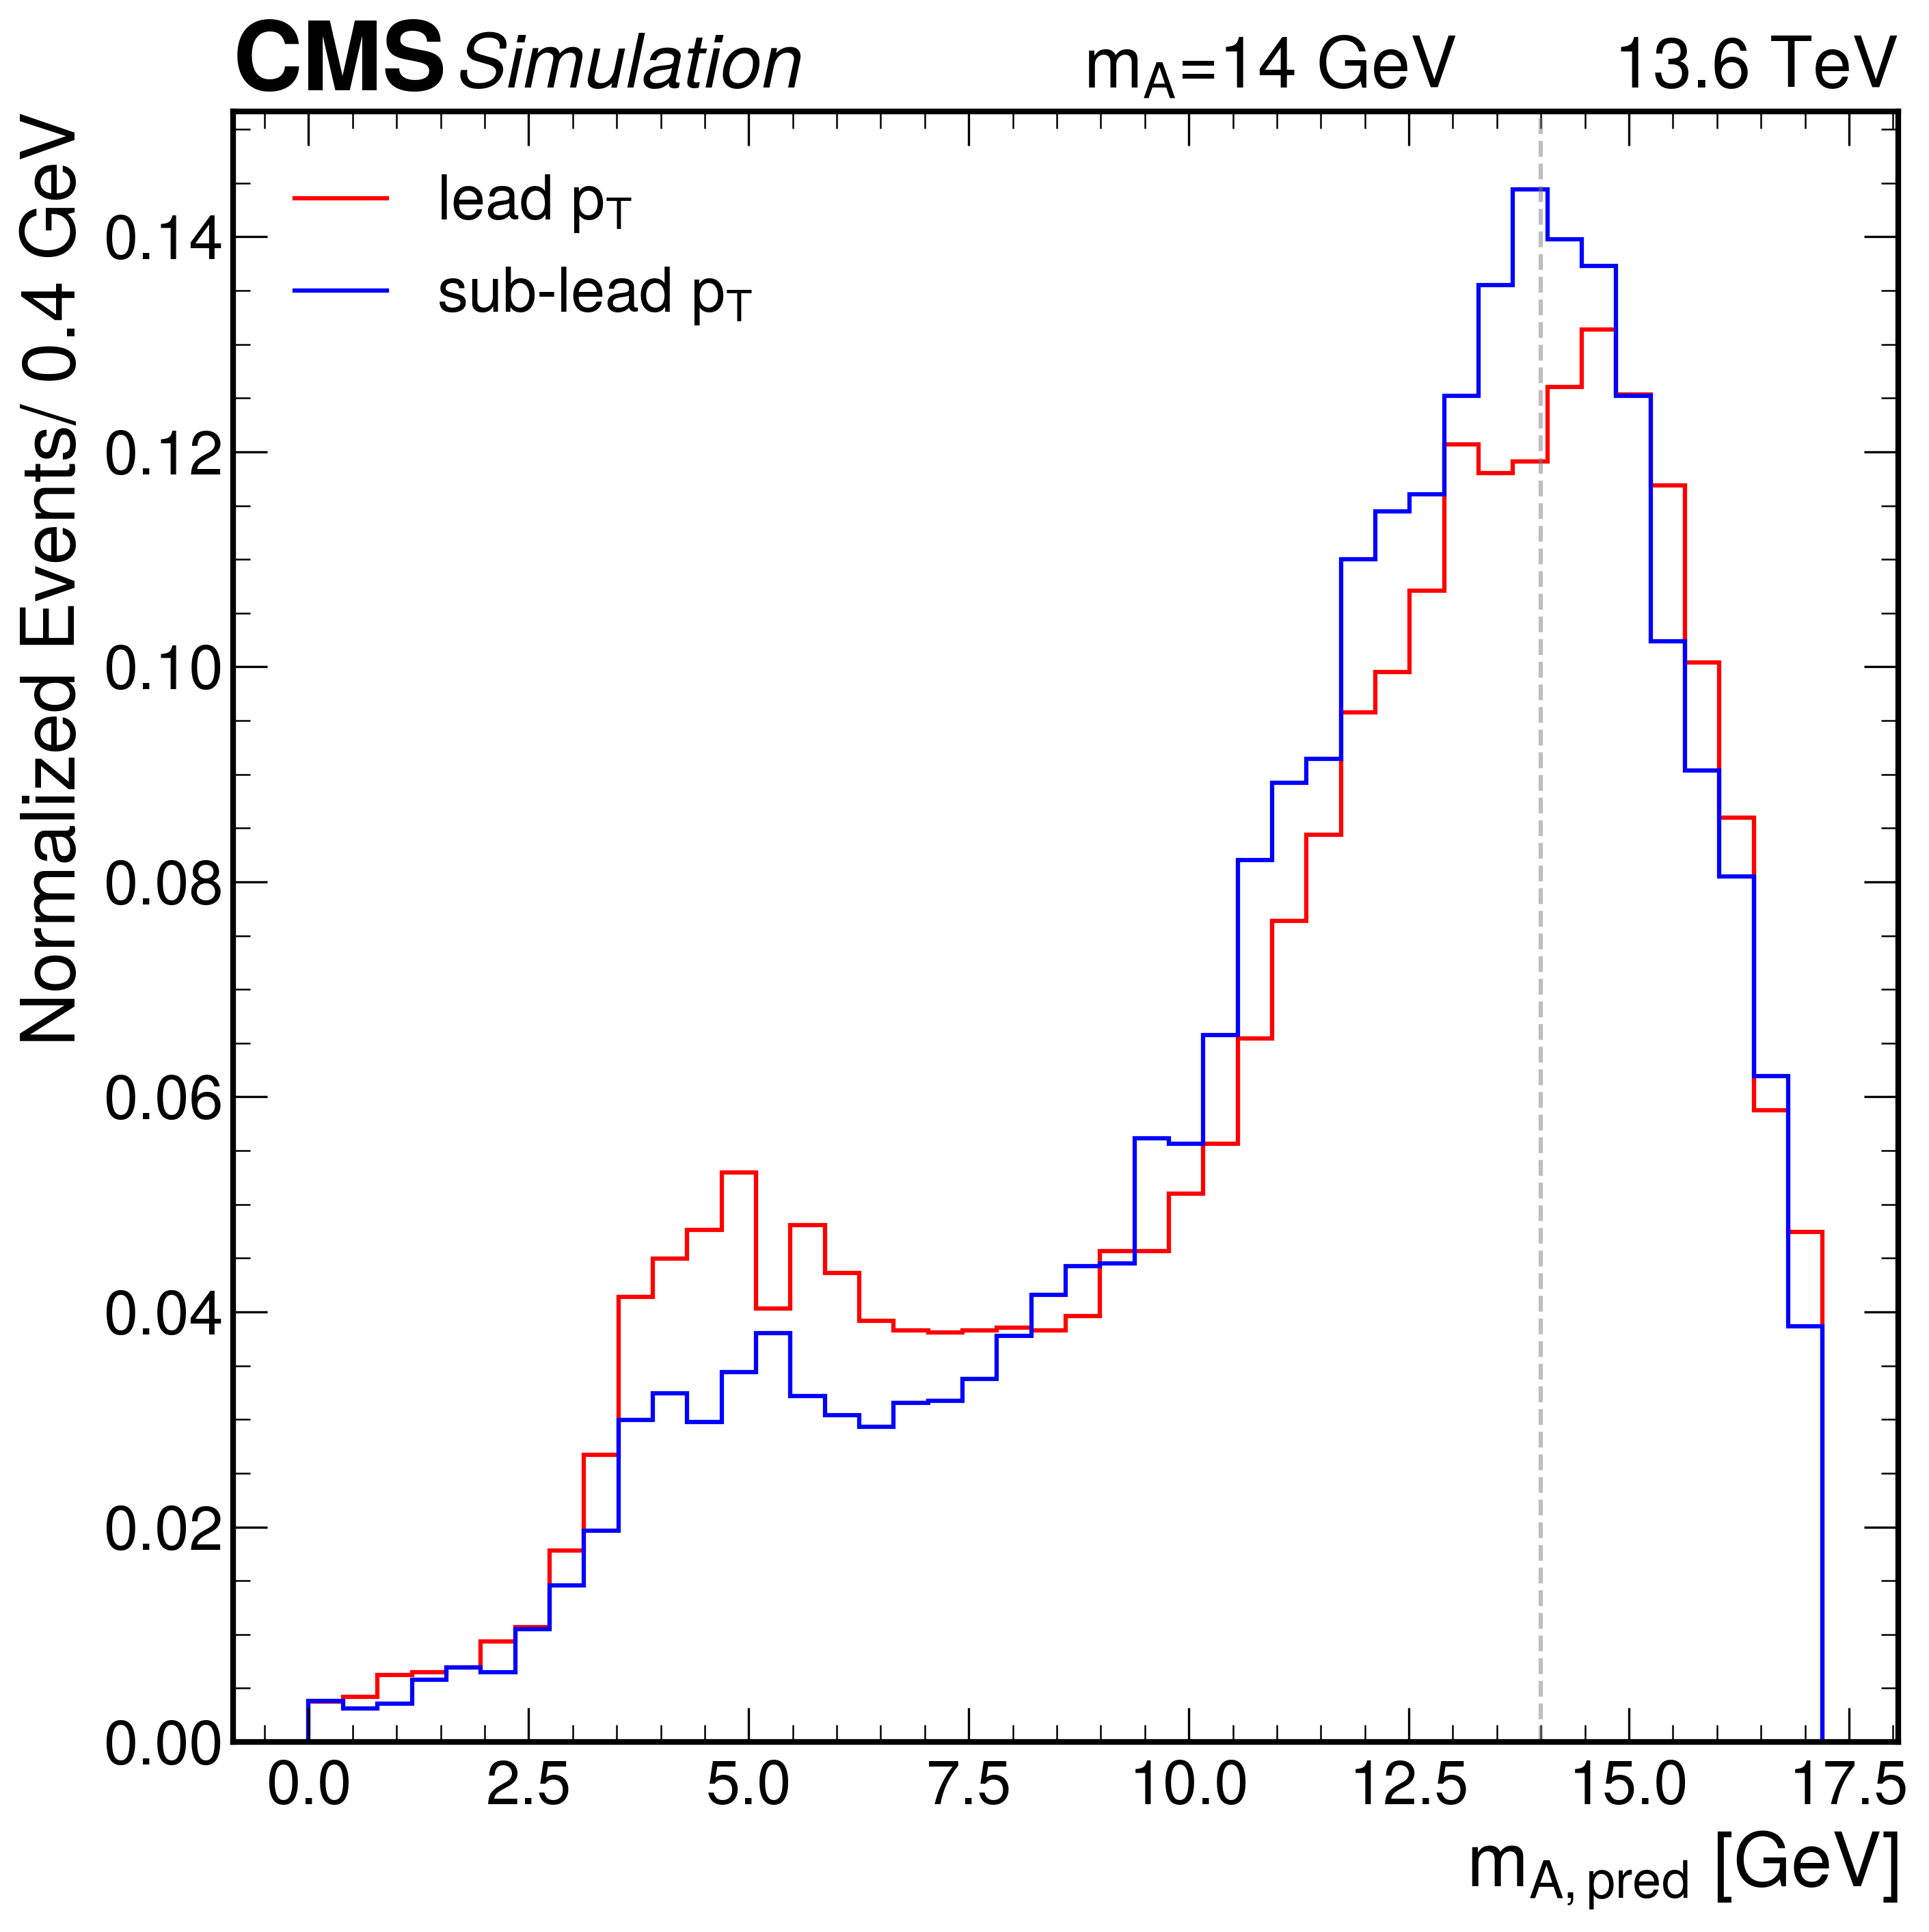

In [352]:
fig, ax = plt.subplots(dpi=300)
out["train_dataset_2"]["A_mass"].plot1d(ax=ax,histtype='step',color="r", density=True)
ax.axvline(x=14, color="grey", linestyle="--", alpha=0.5)
ax.set_xlabel(r"$m_{A, pred}$ [GeV]")
ax.set_ylabel("Normalized Events/ 0.4 GeV")
hep.cms.label(llabel="Simulation ", rlabel= r"$m_A$=14 GeV  " +"      13.6 TeV", loc=0, ax=ax)
ax.legend()
plt.tight_layout()
# plt.savefig(f'{out_dir}/A_mass_plots_signal_mass_14.pdf',facecolor='w',dpi=300)



fig, ax = plt.subplots(dpi=300)
out["train_dataset_2"]["A1_mass"].plot1d(ax=ax,histtype='step',color="r", label=r'lead $p_T$', density=True)
out["train_dataset_2"]["A2_mass"].plot1d(ax=ax,histtype='step',color="b", label=r'sub-lead $p_T$', density=True)
ax.axvline(x=14, color="grey", linestyle="--", alpha=0.5)
ax.set_xlabel(r"$m_{A, pred}$ [GeV]")
ax.set_ylabel("Normalized Events/ 0.4 GeV")
hep.cms.label(llabel="Simulation ", rlabel= r"$m_A$=14 GeV  " +"      13.6 TeV", loc=0, ax=ax)
ax.legend()
plt.tight_layout()
plt.savefig(f'{out_dir}/leading_subleading_A1_A2_plots_signal_mass_14.pdf',facecolor='w',dpi=300)

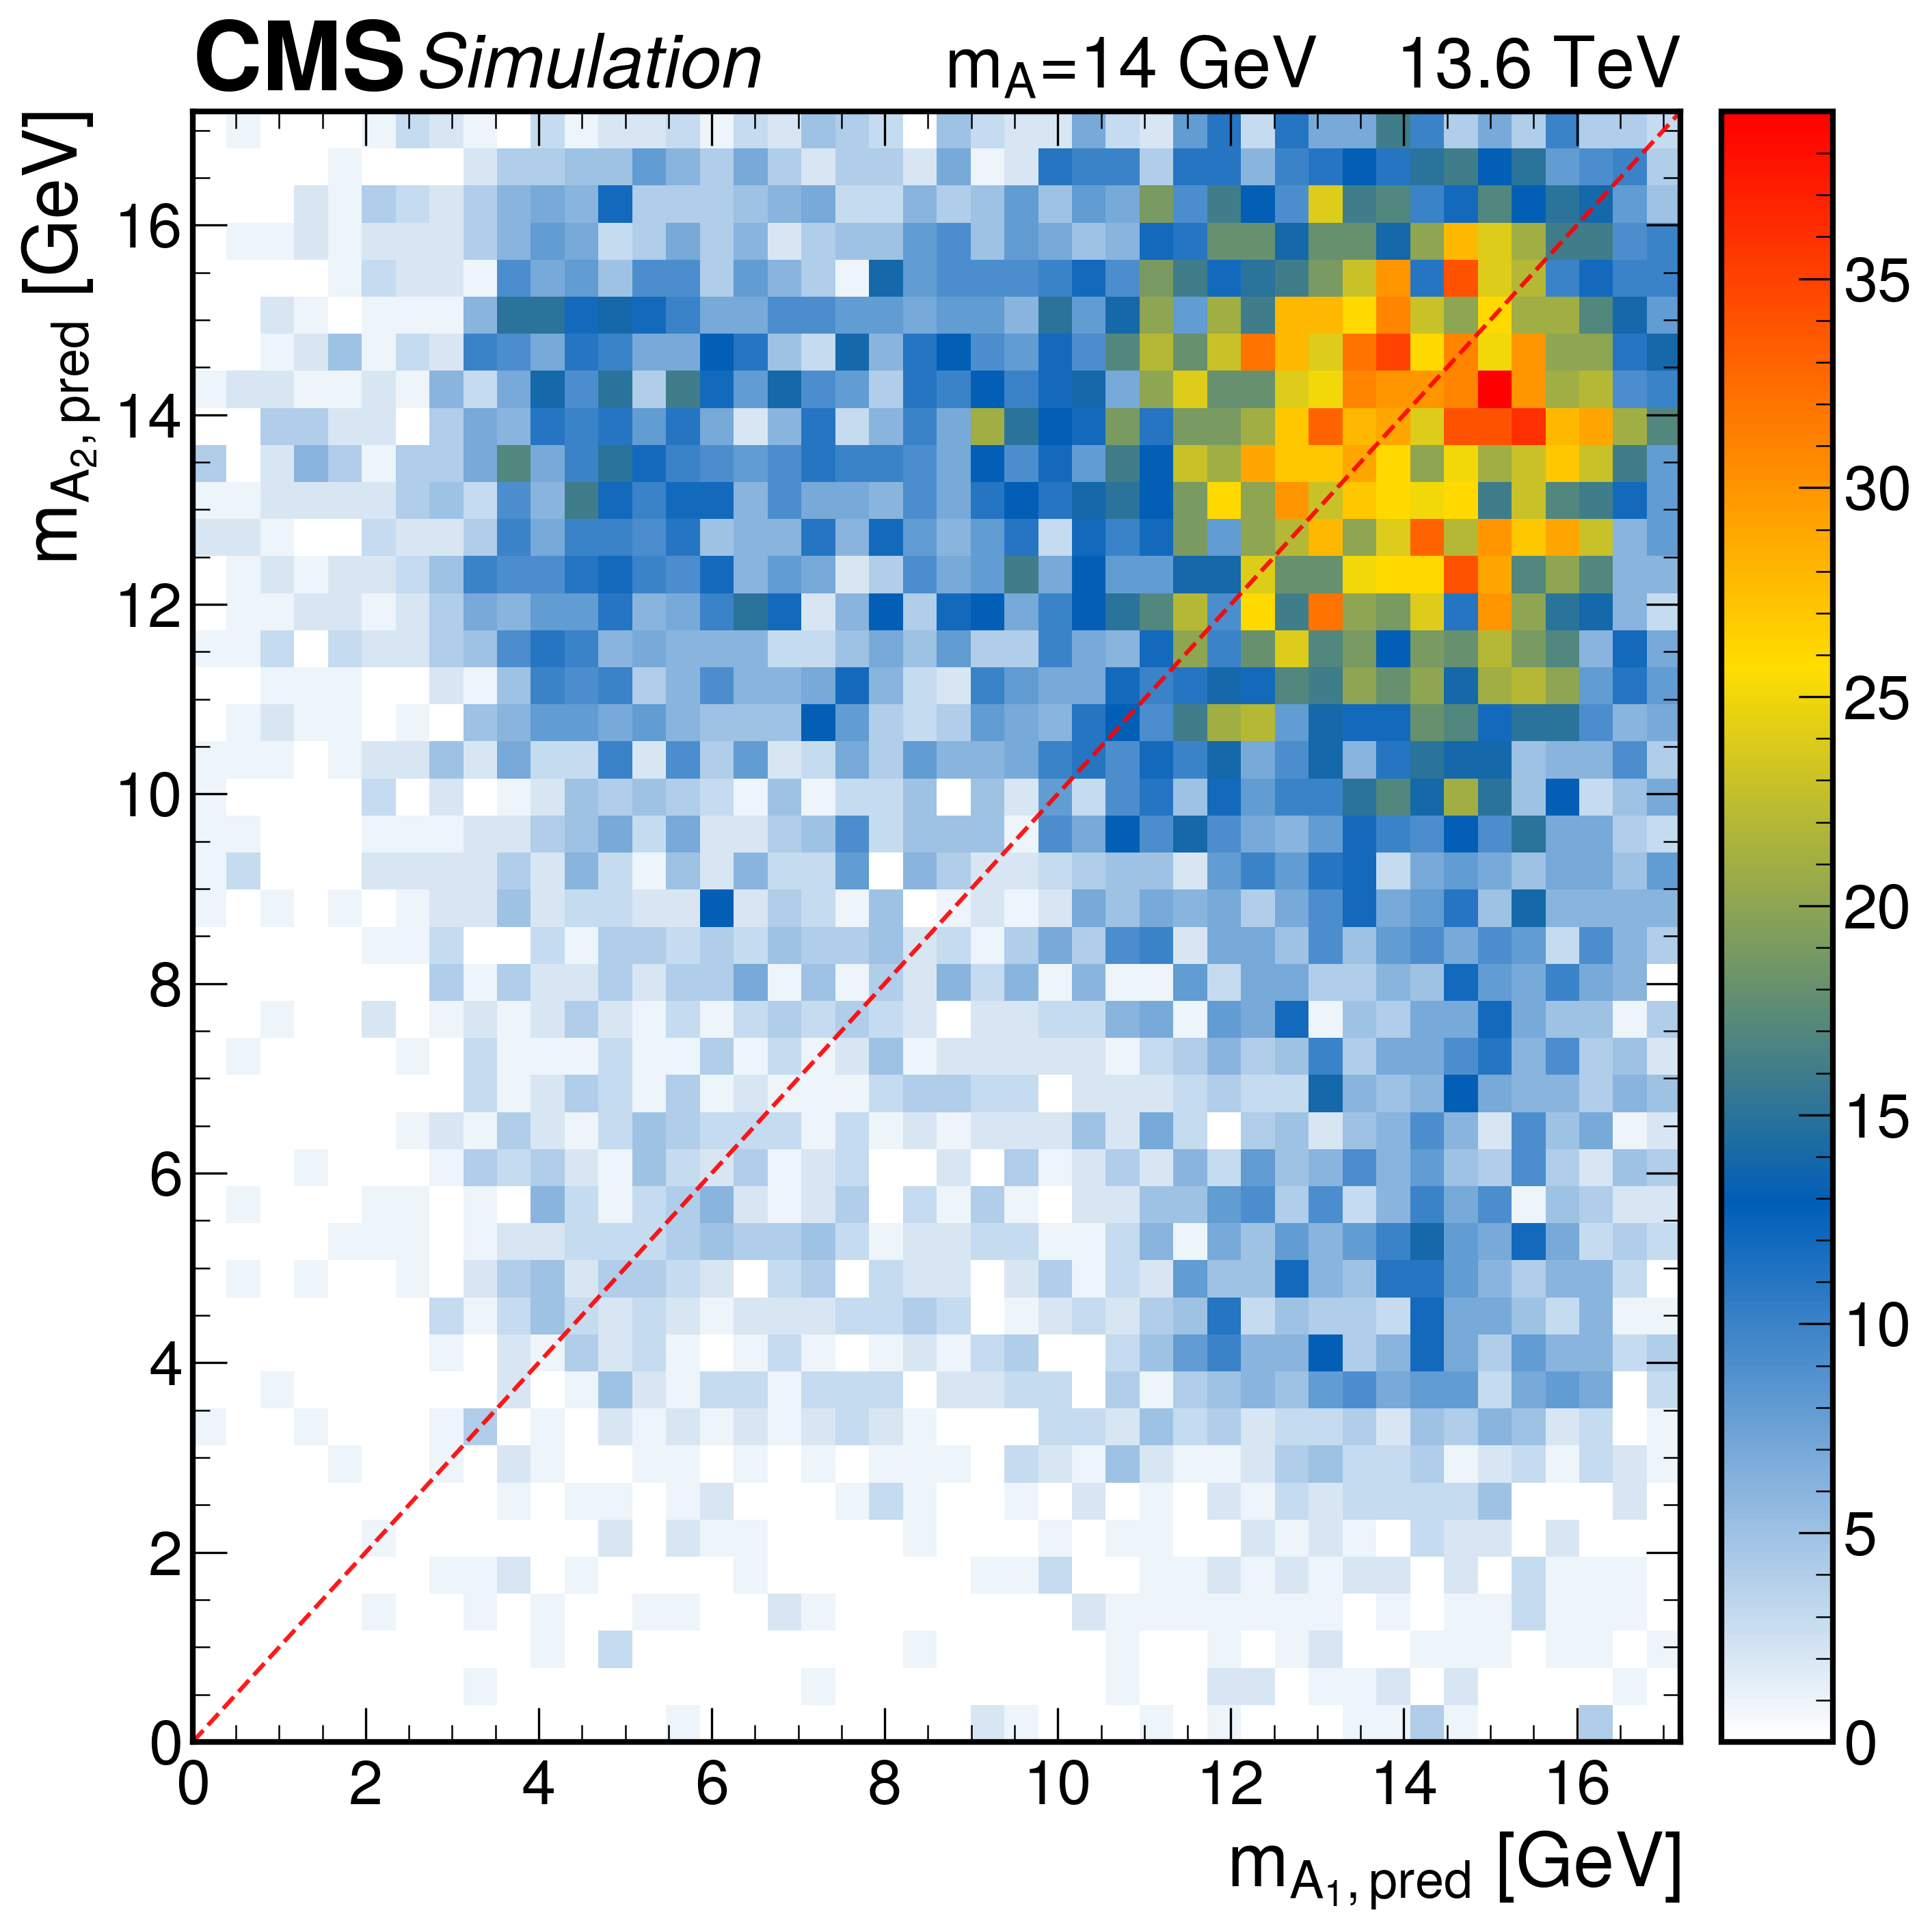

In [354]:
fig, ax = plt.subplots(dpi=300)
# norm = mcolors.TwoSlopeNorm(vmin=0, vmax=2000, vcenter=500)
out["train_dataset_2"]["A1_A2_mass"].plot2d(ax=ax, cmap=cms_cmap)
ax.set_xlabel(r"$m_{A_1, pred}$ [GeV]")
ax.set_ylabel(r"$m_{A_2, pred}$ [GeV]")  # Note: you had set_xlabel twice, should be set_ylabel here
hep.cms.label(llabel="Simulation   ", rlabel= r"$m_A$=14 GeV  " +"  13.6 TeV", loc=0, ax=ax)
plt.plot((0, 22.1-0.4), (0, 22.1-0.4), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(0,17.3,2))
plt.tight_layout()
plt.savefig(f'{out_dir}/leading_subleading_A1_A2_2dplots_signal_mass_14.pdf',facecolor='w',dpi=300)

### for dataset 2

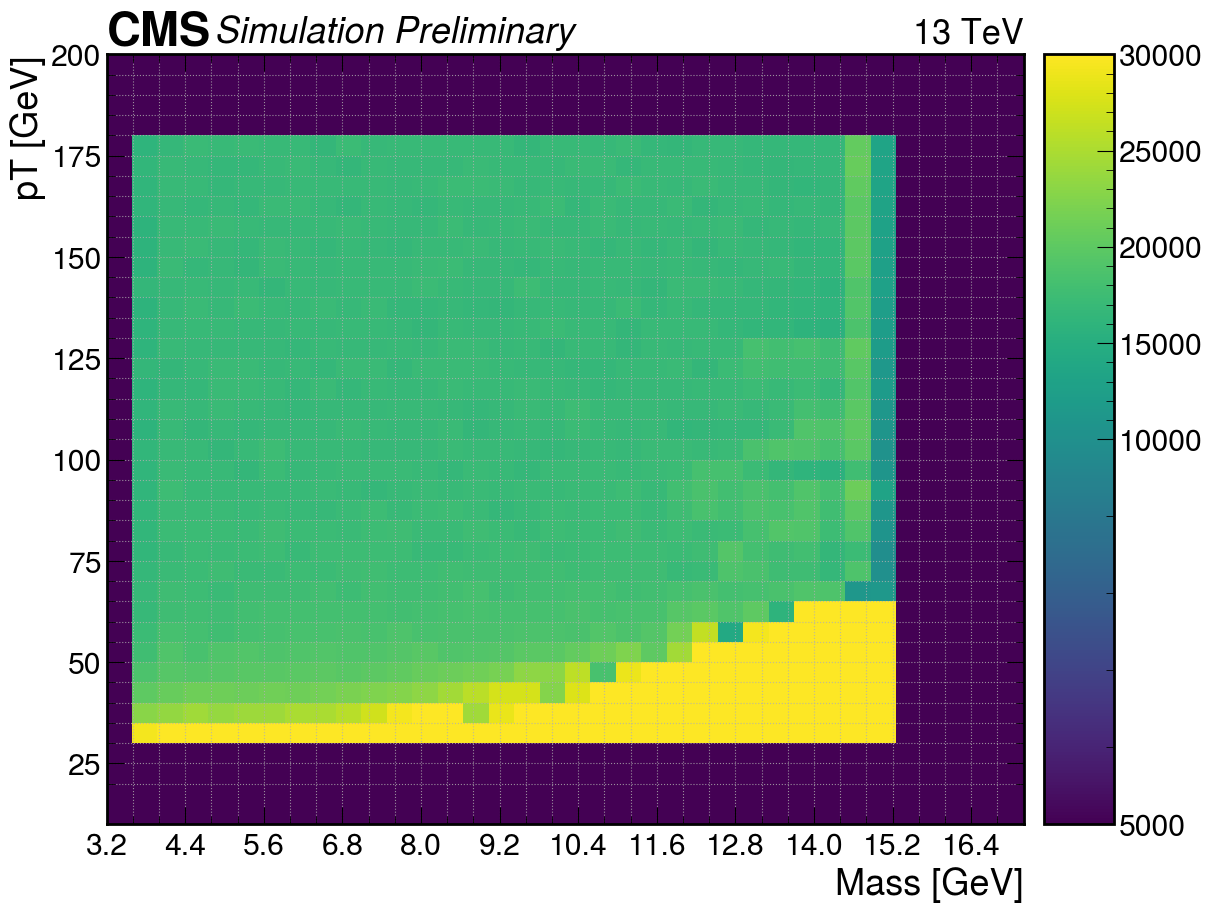

In [65]:
fig, ax = plt.subplots(figsize=(13,10))
norm = mcolors.TwoSlopeNorm(vmin=5000, vmax = 30000, vcenter=10000)
out["train_dataset_2"]["a_mass_pt"].plot2d(norm=norm)
ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
ax.set_yticks(np.arange(20, 200, 5), minor=True)
plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/a_mass_pt_2d_hist.png',facecolor='w',dpi=300)

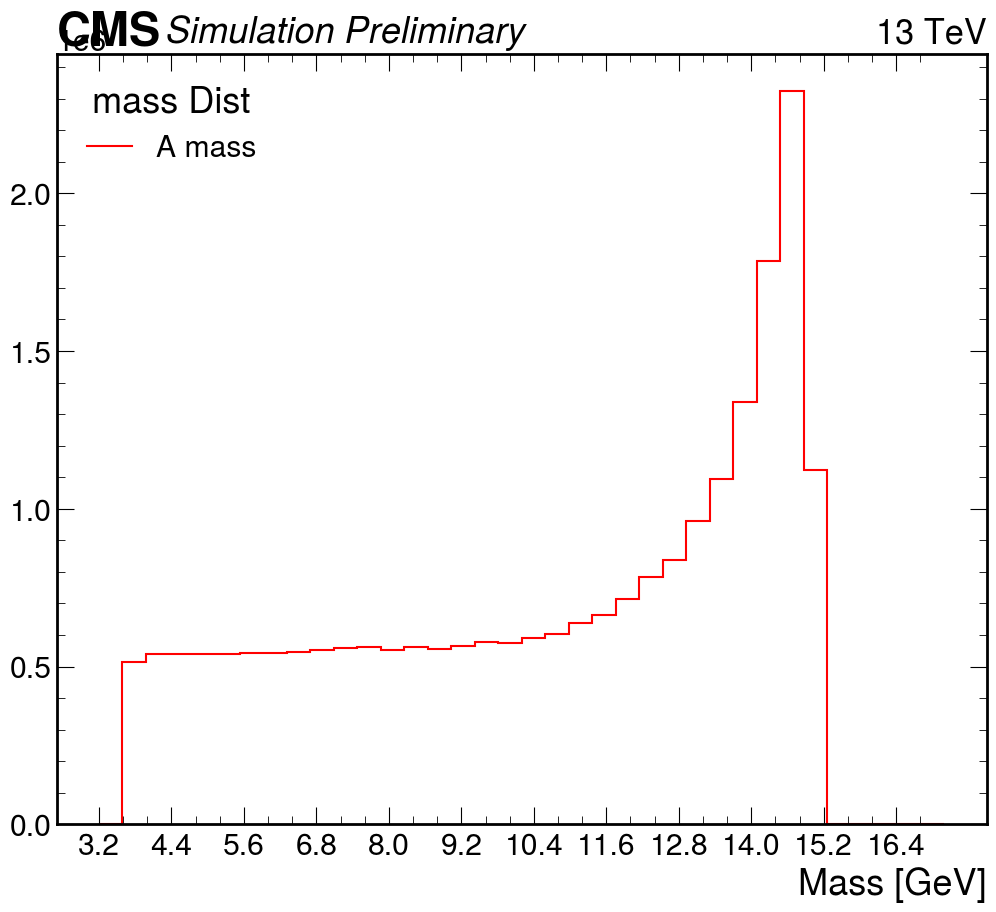

In [80]:
fig, ax = plt.subplots(figsize=(12,10))
out["train_dataset_2"]["a_mass"].plot1d(ax=ax,histtype='step',color="r")
ax.legend(title="mass Dist")
ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/a_mass_1d_hist.png',facecolor='w',dpi=300)

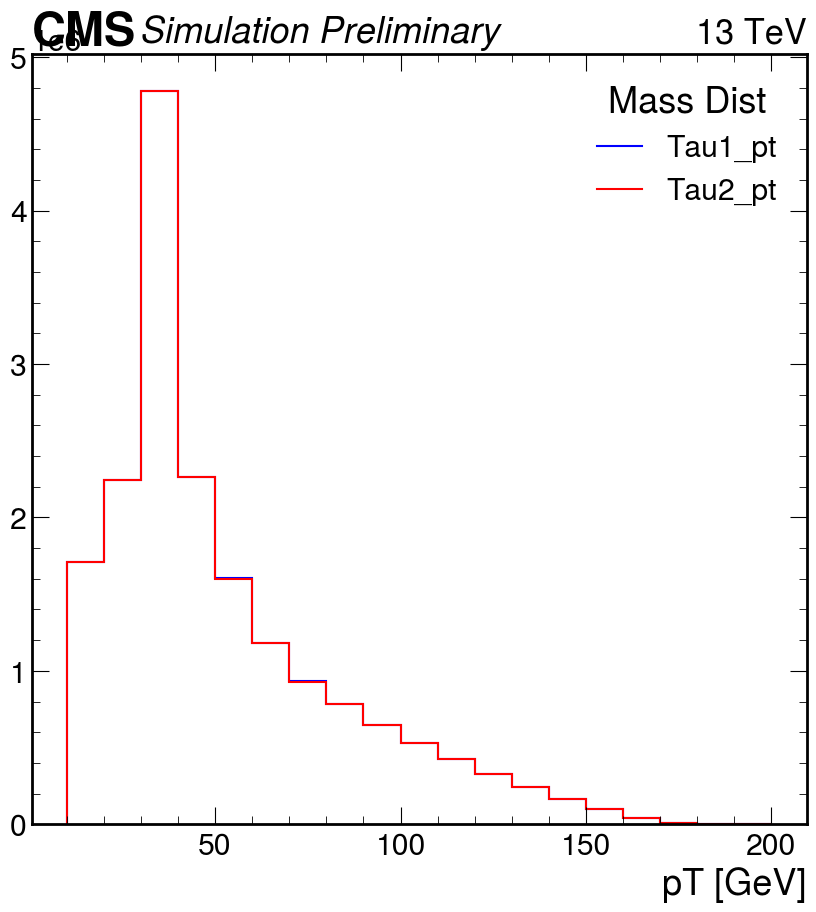

In [72]:
fig, ax = plt.subplots()
out["train_dataset_2"]["tau1_pt"].plot1d(ax=ax,histtype='step',color='b')
out["train_dataset_2"]["tau2_pt"].plot1d(ax=ax,histtype='step', color='r')
# ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/tau1pttau2pt_hist.png',facecolor='w',dpi=300)

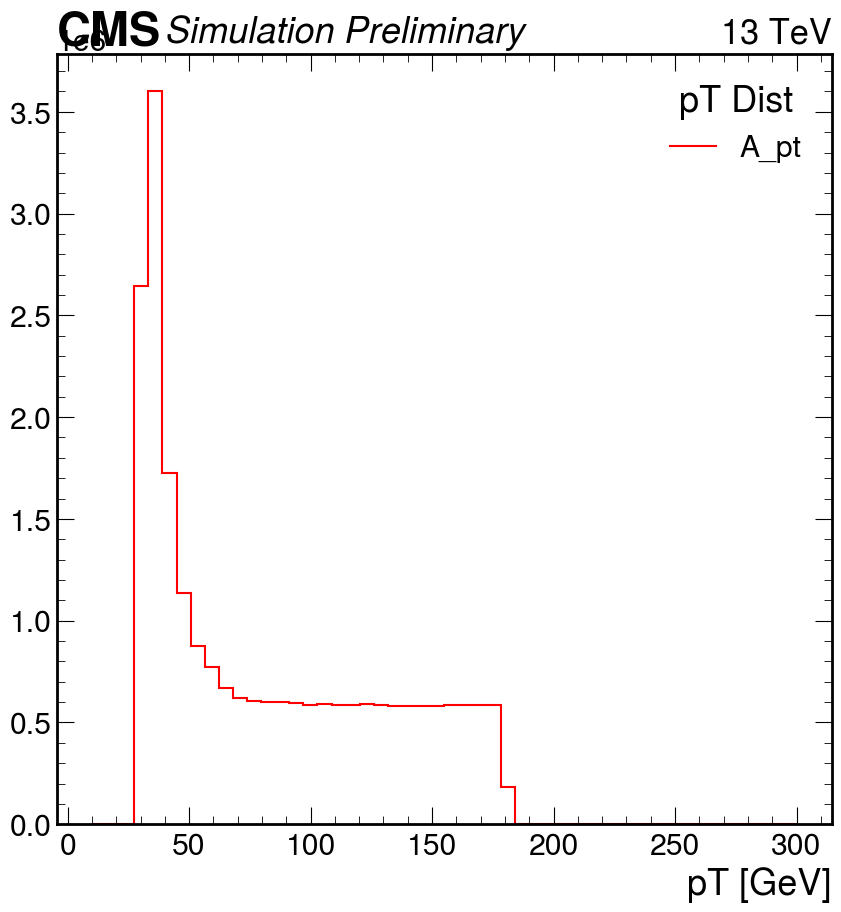

In [14]:
fig, ax = plt.subplots()
out["train_dataset_2"]["a_pt"].plot1d(ax=ax,histtype='step',color="r")
# out["train_mass"]["tau2_pt"].plot1d(ax=ax,histtype='step',color="b")
# ax.set_yscale("log")
ax.legend(title="pT Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/a_pt_1d_hist.png',facecolor='w',dpi=300)

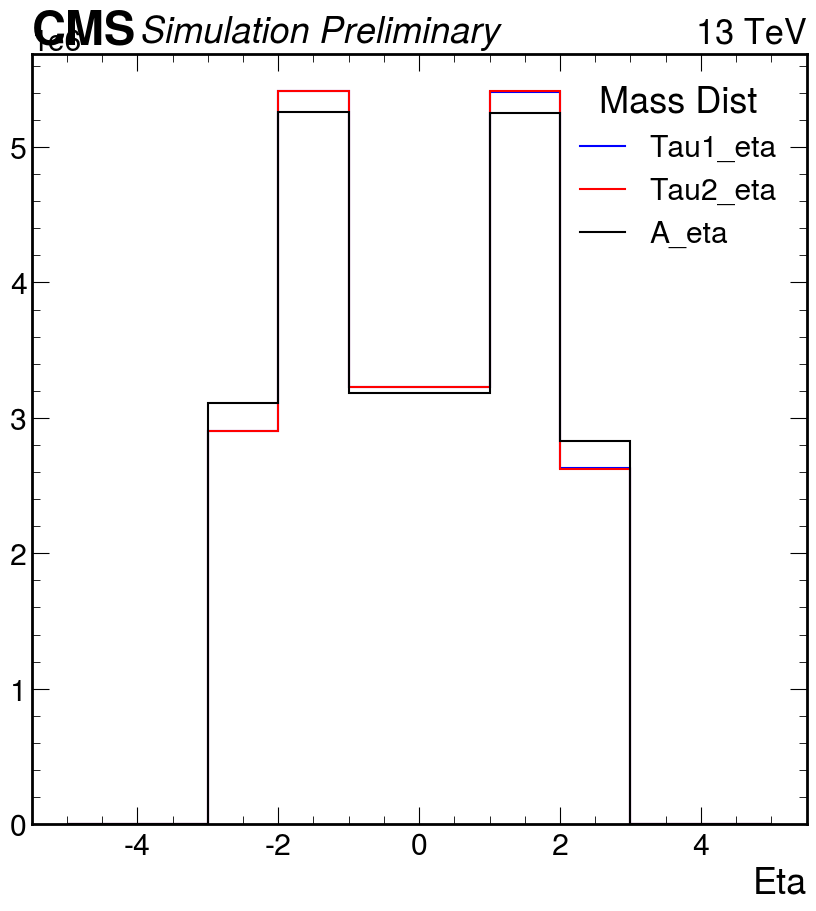

In [20]:
fig, ax = plt.subplots()
out["train_dataset_2"]["tau1_eta"].plot1d(ax=ax,histtype='step',color='b')
out["train_dataset_2"]["tau2_eta"].plot1d(ax=ax,histtype='step', color='r')
out["train_dataset_2"]["a_eta"].plot1d(ax=ax,histtype='step',color="black")
# ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/eta_dist_hist.png',facecolor='w',dpi=300)

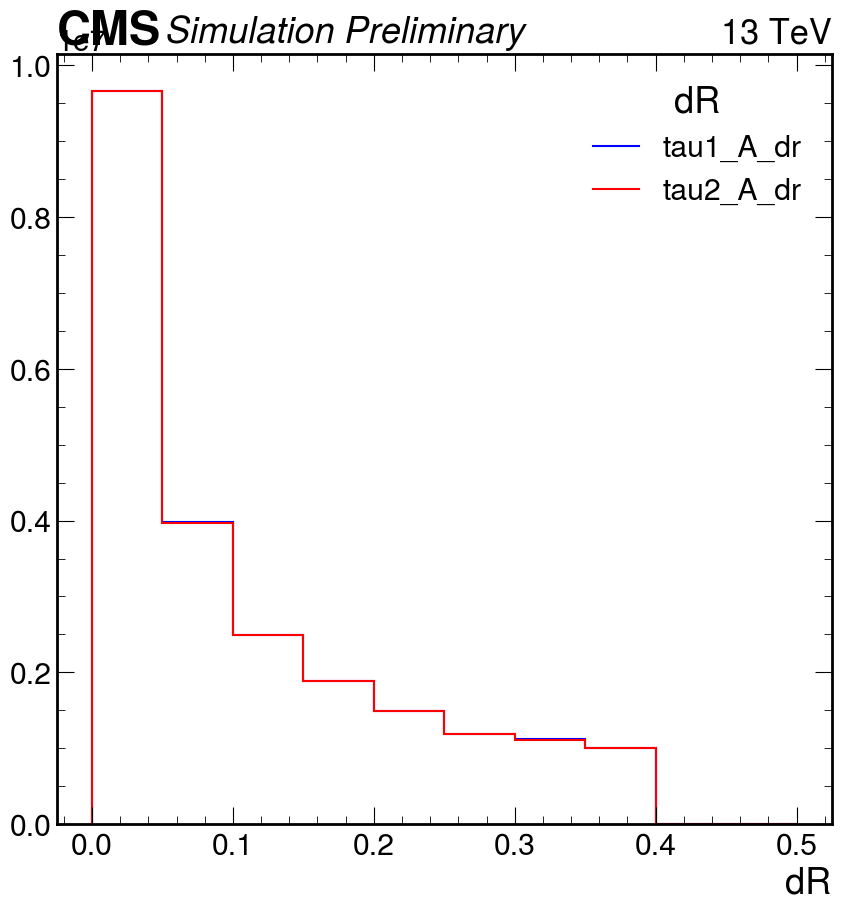

In [22]:
fig, ax = plt.subplots()
out["train_dataset_2"]["tau1_A_dr"].plot1d(ax=ax,histtype='step',color='b')
out["train_dataset_2"]["tau2_A_dr"].plot1d(ax=ax,histtype='step', color='r')

# ax.set_yscale("log")
ax.legend(title="dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/A_tau_dR_hist.png',facecolor='w',dpi=300)

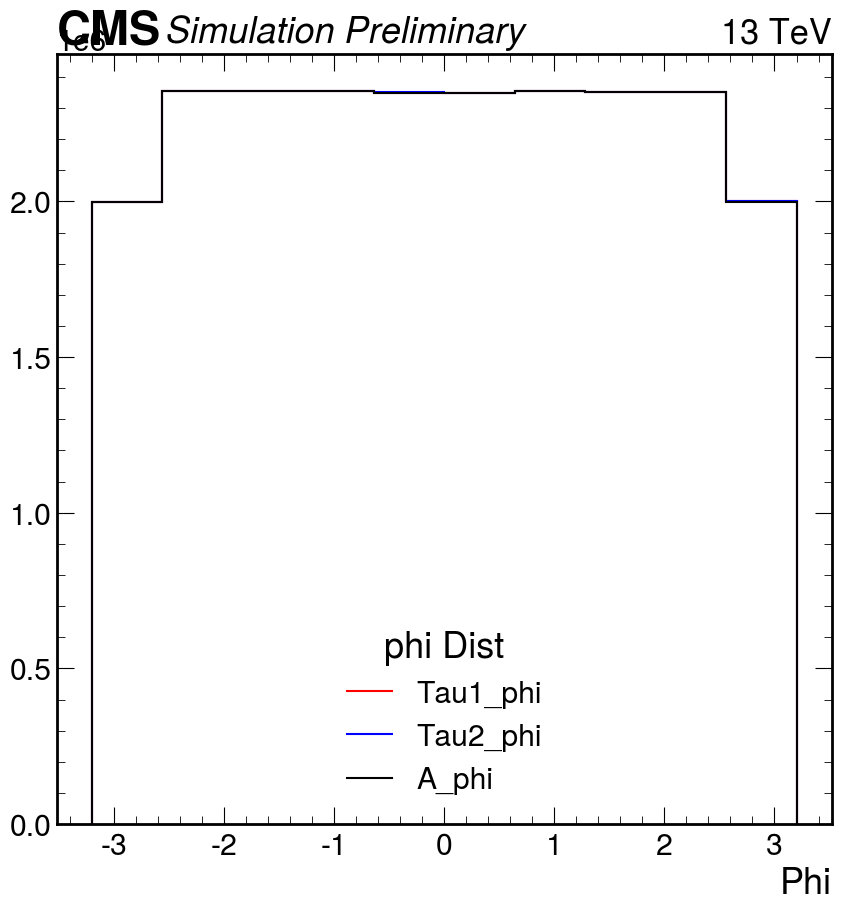

In [18]:
fig, ax = plt.subplots()
out["train_dataset_2"]["tau1_phi"].plot1d(ax=ax,histtype='step',color="r")
out["train_dataset_2"]["tau2_phi"].plot1d(ax=ax,histtype='step',color="b")
out["train_dataset_2"]["a_phi"].plot1d(ax=ax,histtype='step',color="black")
# ax.set_yscale("log")
ax.legend(title="phi Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/phi_dist_hist.png',facecolor='w',dpi=300)

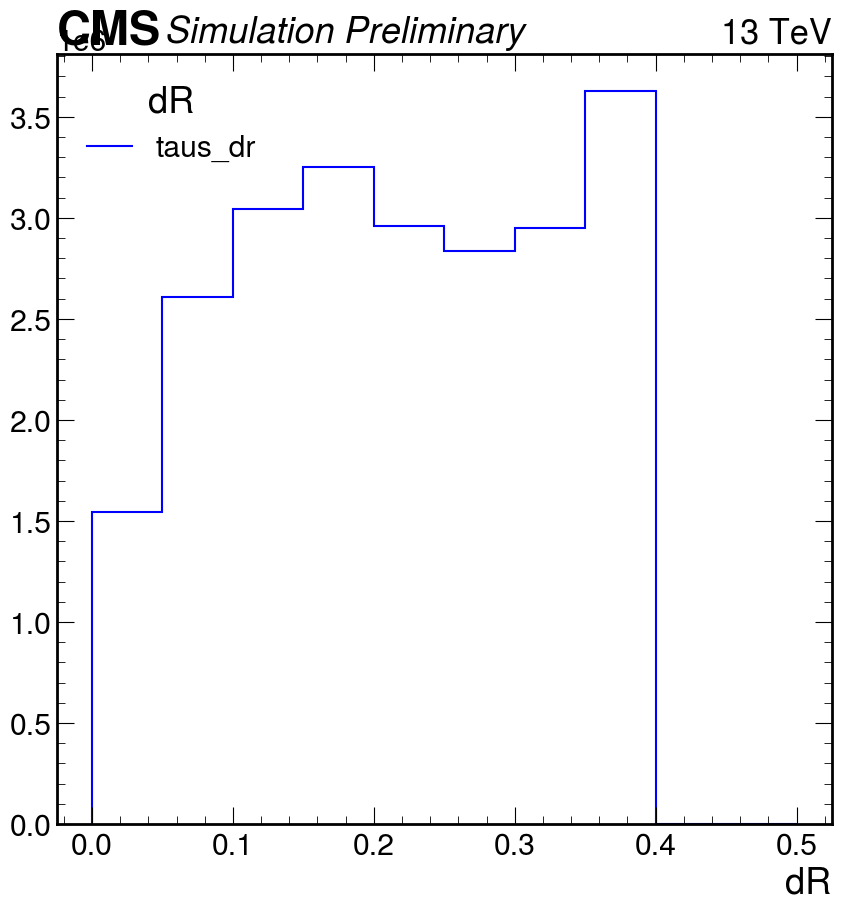

In [25]:
fig, ax = plt.subplots()
out["train_dataset_2"]["taus_dr"].plot1d(ax=ax,histtype='step',color='b')

# ax.set_yscale("log")
ax.legend(title="dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/tau_tau_dR_hist.png',facecolor='w',dpi=300)

In [122]:
mass_A1_chunk = np.full((5, 2), -9999.9999, dtype=np.float32)

In [123]:
mass_A1_chunk

array([[-10000., -10000.],
       [-10000., -10000.],
       [-10000., -10000.],
       [-10000., -10000.],
       [-10000., -10000.]], dtype=float32)

In [194]:
# file_m3p7 = uproot.open("../analysis_run3/H2AA4Tau/ntupleAnalysis/output_87_added_mass_inference_up_and_r.root")
# RHTree_m3p7 = file_m3p7["fevt/RHTree"]
# mass_A1 = RHTree_m3p7.arrays(["jetpT"],"jetpT > -111",library="pd")['jetpT']
# fig, ax = plt.subplots(dpi=300)
# plt.hist(mass_A1, bins=np.arange(0,22,0.4),histtype='step',linestyle='-',linewidth=2, color='b',alpha=0.9,label="A = 3.7 GeV", density = True)

infile="../analysis_run3/H2AA4Tau/massregression_inference/output_25_added_mass_inference_up_and_r.root"

needed = ["jetpT", "jetSeed_iphi", "jetSeed_ieta", "TaudR", "mass_A1", "mass_A2"]
mass_A1, mass_A2 =[], []
for arrays in uproot.iterate(
    infile + ":fevt/RHTree",
    filter_name=needed,
    step_size=50,
    library="np",  # gives dict of NumPy arrays per branch
    ):
    mass_A1.append(arrays["mass_A1"].flatten().tolist())
    mass_A2.append(arrays["mass_A2"].flatten().tolist())
mass_A1 = np.concatenate(mass_A1, axis=0)
mass_A2 = np.concatenate(mass_A2, axis=0)
mass_A1 = mass_A1[mass_A1>-1000]
mass_A2 = mass_A2[mass_A2>-1000]


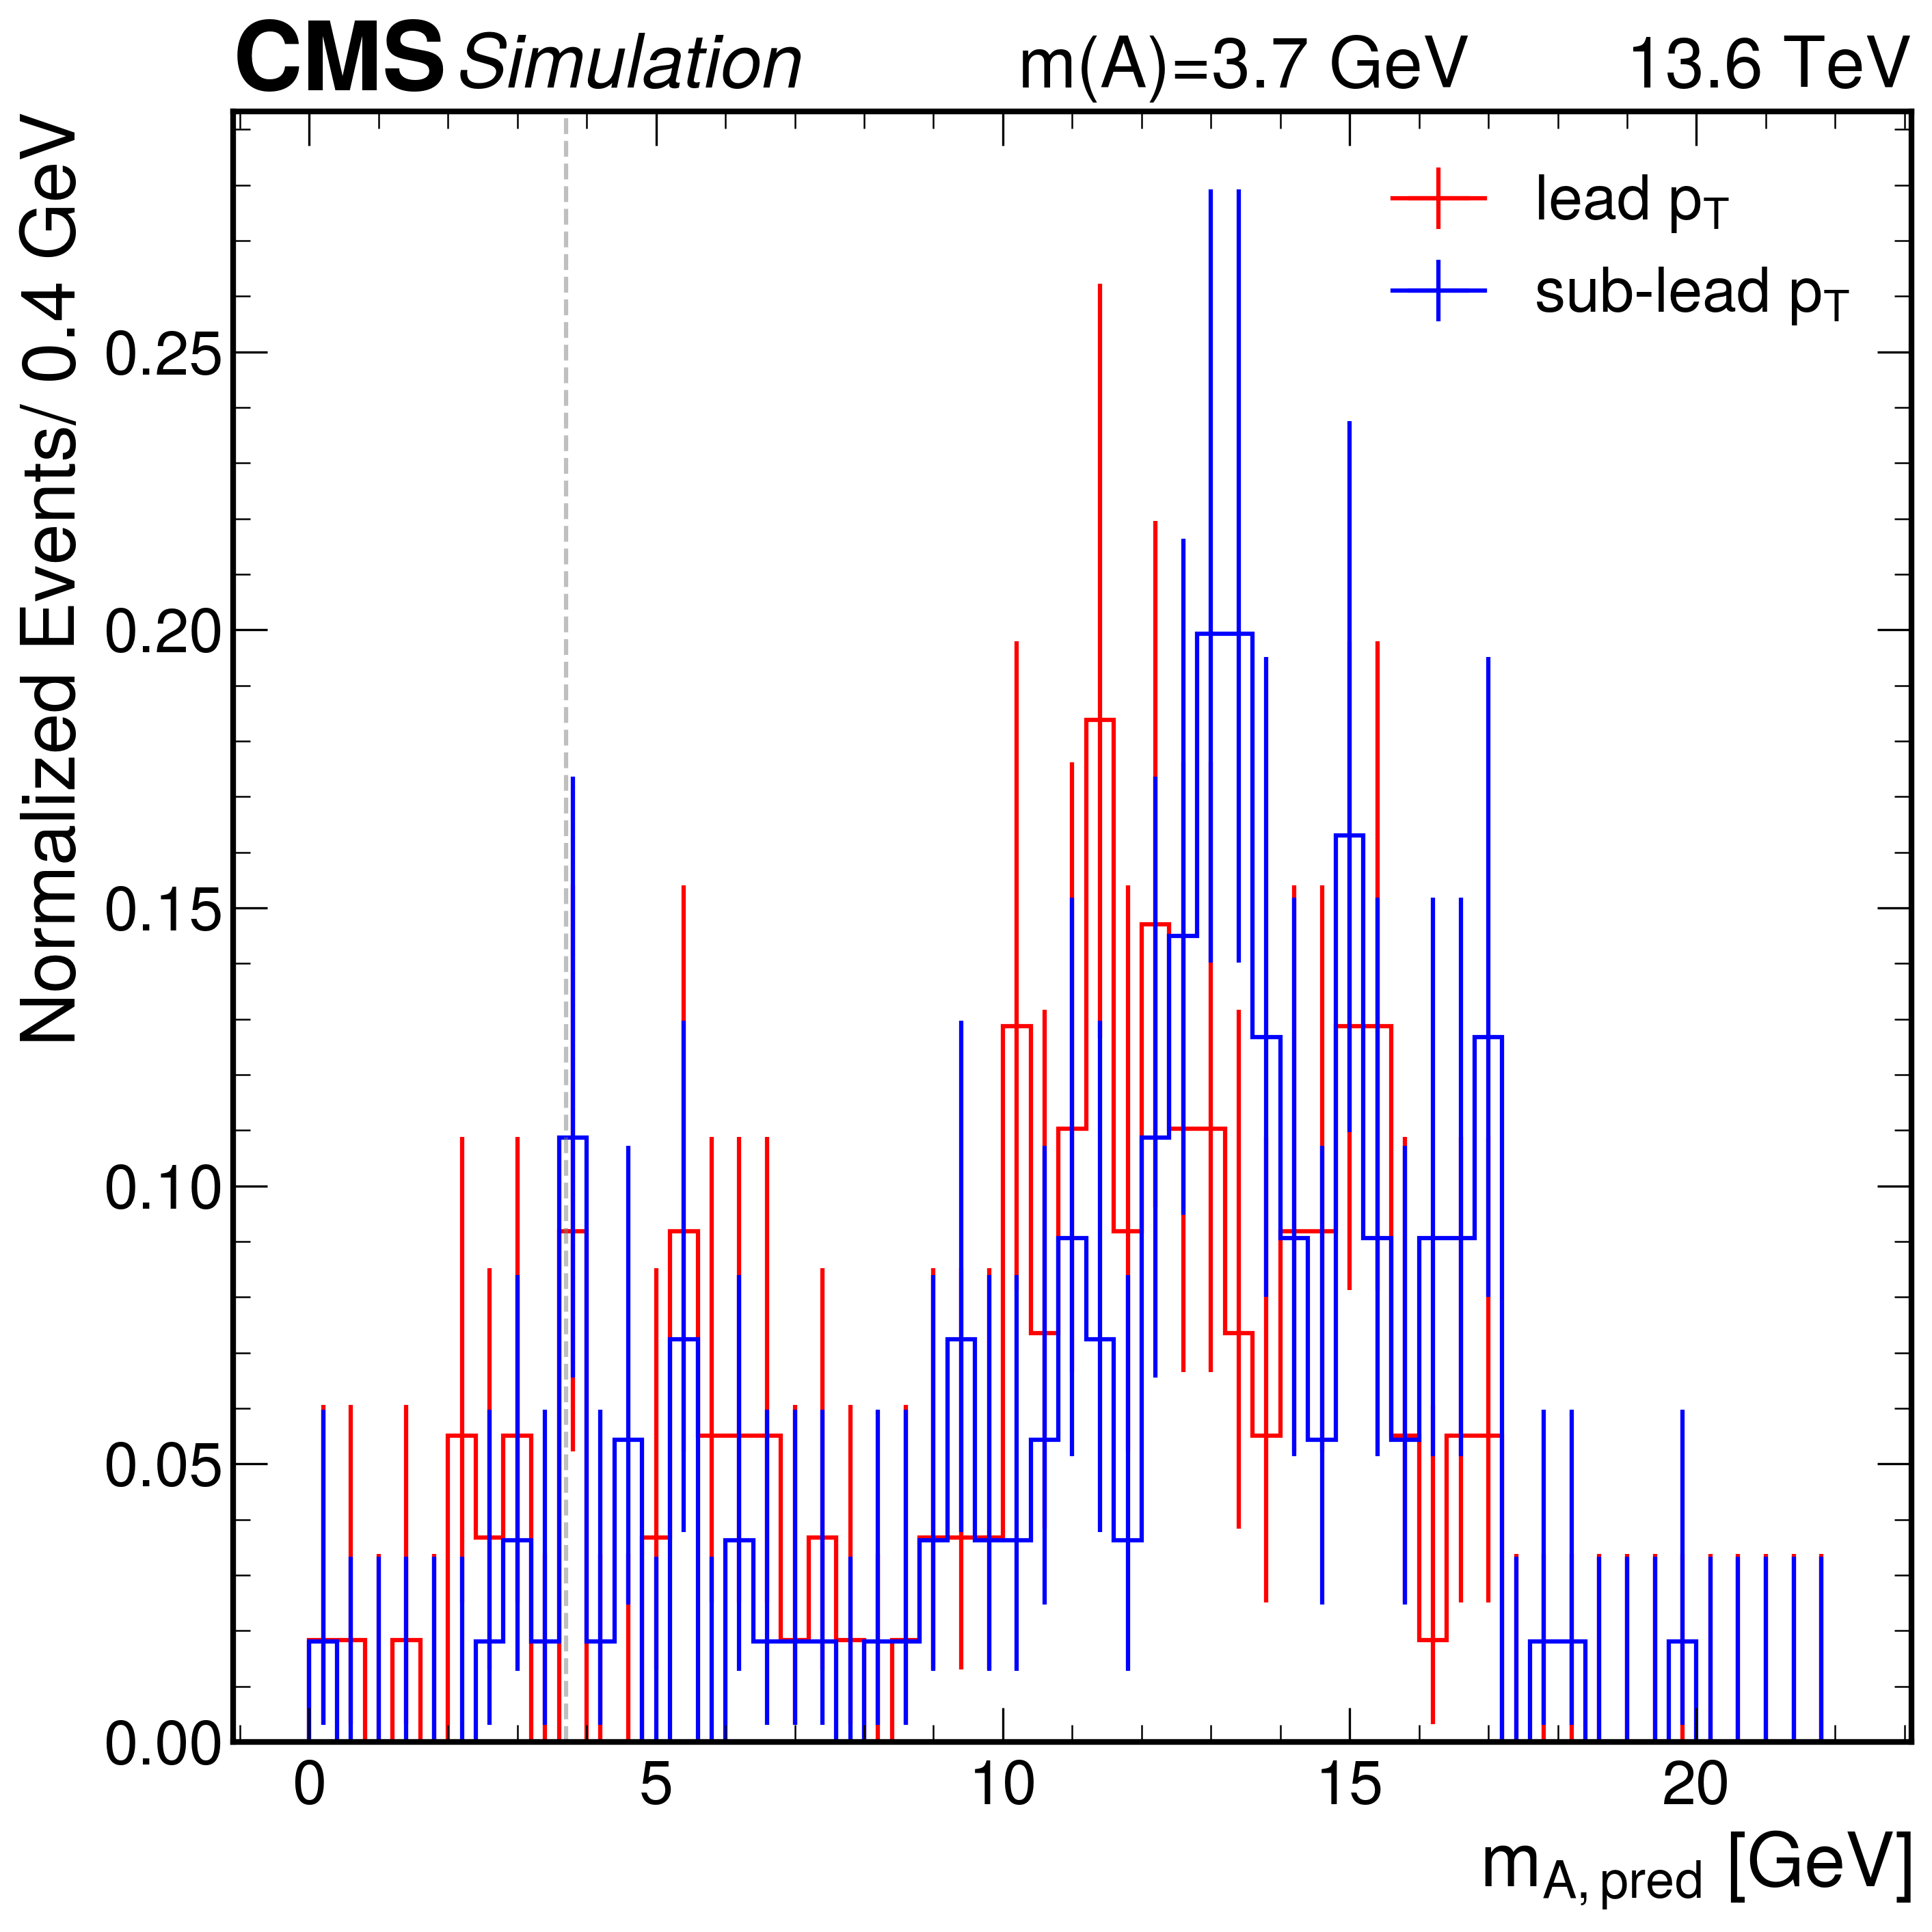

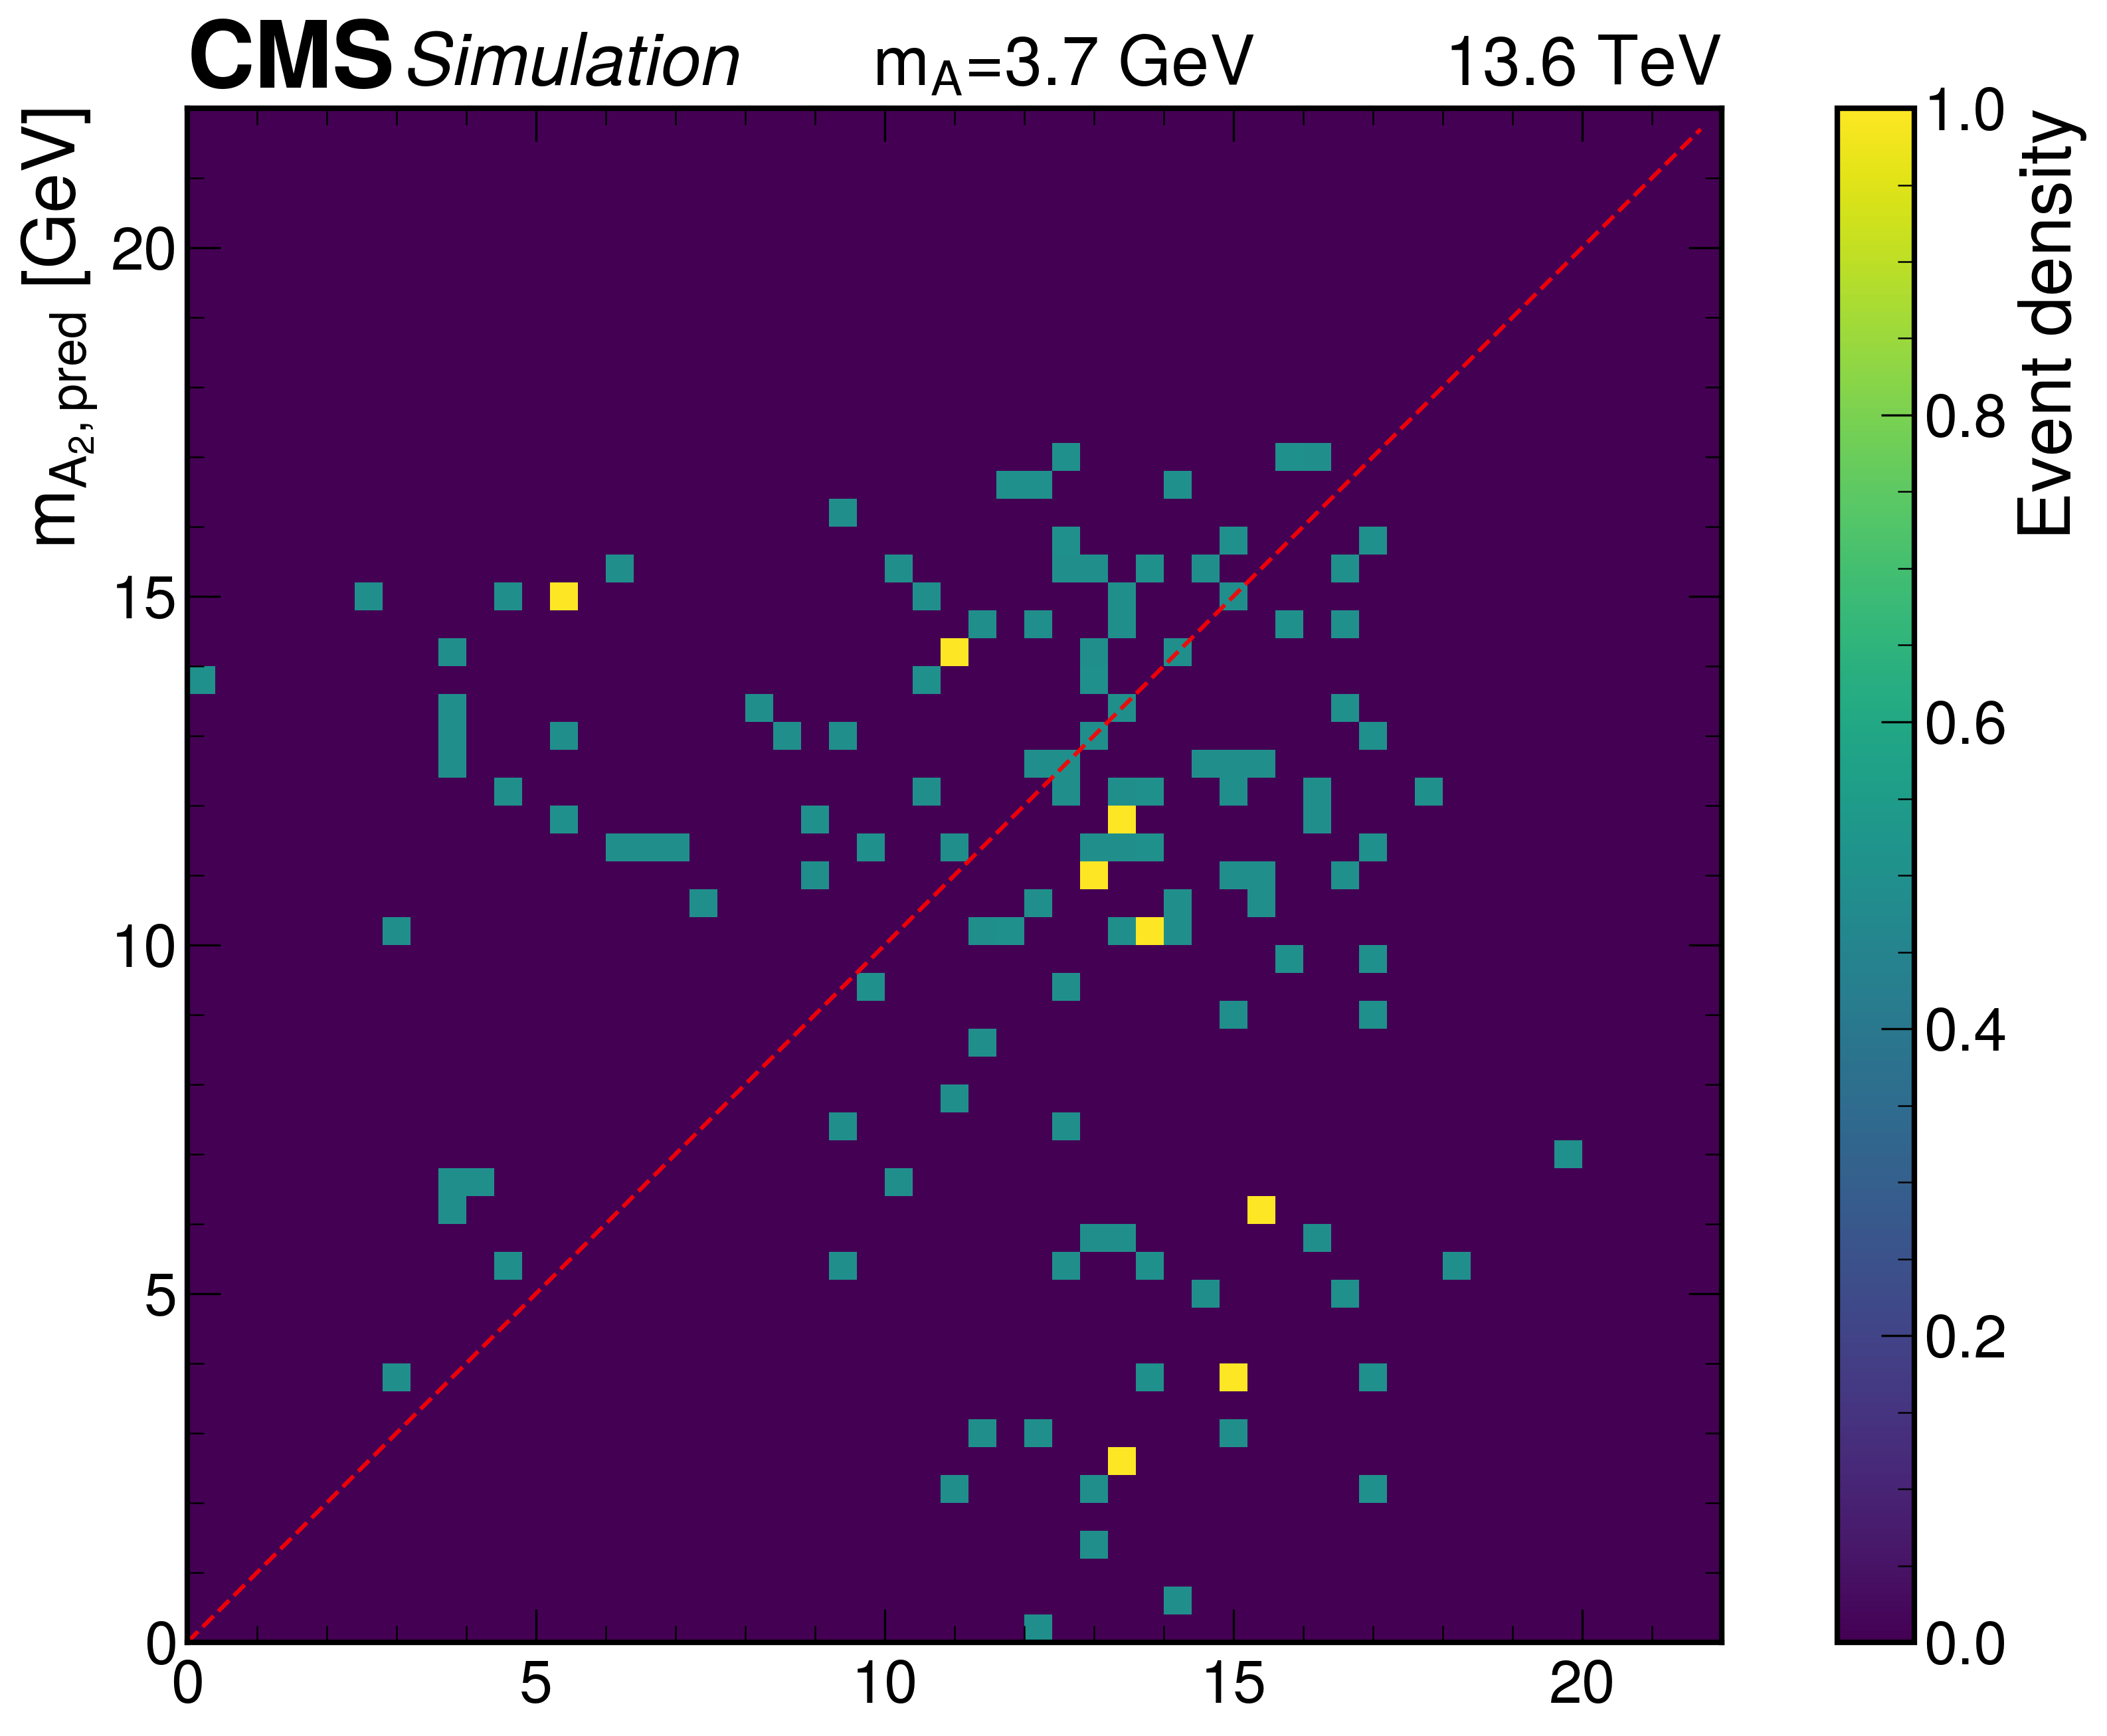

In [195]:
m0_min=0
m0_max=22.1
bin_size=0.4

fig, ax = plt.subplots(dpi=300)

h2=np.histogram(mass_A1, bins=np.arange(m0_min,m0_max,bin_size))
hep.histplot(h2, histtype='step', yerr=True, label=r'lead $p_T$', linestyle='-', color='red', density=True)

h3=np.histogram(mass_A2, bins=np.arange(m0_min,m0_max,bin_size))
hep.histplot(h3, histtype='step', yerr=True, label=r'sub-lead $p_T$', linestyle='-', color='blue', density=True)

ax.axvline(x=3.7, color="grey", linestyle="--", alpha=0.5)
ax.set_xlabel(r"$m_{A, pred}$ [GeV]")
ax.set_ylabel("Normalized Events/ 0.4 GeV")
hep.cms.label(llabel="Simulation ", rlabel= "m(A)=3.7 GeV  " +"      13.6 TeV", loc=0, ax=ax)
ax.legend()
plt.tight_layout()
# plt.savefig(f'{out_dir}/leading_subleading_A1_A2_plots_signal_mass_3p7.pdf',facecolor='w',dpi=300)



fig, ax = plt.subplots(figsize=(15, 10), dpi=300)
bins = np.arange(m0_min, m0_max,0.4)
H, xedges, yedges = np.histogram2d(mass_A1, mass_A2, bins =[bins, bins], density = True)
H_normalized = H/H.max((0,1)) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im = ax.imshow(H_normalized, extent=extent, interpolation='none',origin ='lower')
plt.colorbar(im, ax=ax, label='Event density')
plt.xticks(np.arange(m0_min, m0_max,5))
plt.yticks(np.arange(m0_min, m0_max,5))
plt.ylabel(r"$m_{A_1, pred}$ [GeV]")
plt.ylabel(r"$m_{A_2, pred}$ [GeV]") 
plt.plot((m0_min, m0_max-0.4), (m0_min, m0_max-0.4), color='r', linestyle='--', alpha=0.9)
hep.cms.label(llabel=f"Simulation ", rlabel=f"   $m_A$=3.7 GeV          13.6 TeV", loc=0, ax=ax)
plt.show()

In [3]:
with open("inference_signal_14_GeV.json", "r") as fin:
    file_list_train2 = json.load(fin) 
    
needed = ["jetpT", "jetSeed_iphi", "jetSeed_ieta", "TaudR", "mass_A1_raw", "mass_A2_raw", "mass_A1", "mass_A2"]
mass_A1, mass_A2, dr =[], [], []

for infile in file_list_train2[0:2]:
# infile=file_list_train2[0]        
    for arrays in uproot.iterate(
        infile + ":fevt/RHTree",
        filter_name=needed,
        step_size=50,
        library="np"):  # gives dict of NumPy arrays per branch
        # print(arrays["mass_A2"][:,1])
        mass_A1.append(arrays["mass_A1"][:,0].flatten().tolist())
        mass_A2.append(arrays["mass_A2"][:,1].flatten().tolist())
        dr.append(arrays["TaudR"].flatten().tolist())
mass_A1 = np.concatenate(mass_A1, axis=0)
mass_A2 = np.concatenate(mass_A2, axis=0)
dr = np.concatenate(dr, axis=0)
dr = dr[mass_A1>-99]
mass_A1 = mass_A1[mass_A1>-99]
mass_A2 = mass_A2[mass_A2>-99]
print(len(mass_A1), len(mass_A2), len(dr))
mass_A1low = mass_A1[dr<=0.4]
mass_A1high = mass_A1[dr>0.4]

330 330 330


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [4]:
mass_A1, mass_A2, dr = [], [], []

for infile in file_list_train2:
    for arrays in uproot.iterate(
        infile + ":fevt/RHTree",
        filter_name=needed,
        step_size=50,
        library="np"
    ):
        # flatten properly to 1D
        mass_A1.append(np.ravel(arrays["mass_A1"][:,0]))
        mass_A2.append(np.ravel(arrays["mass_A2"][:,1]))
        dr.append(np.ravel(arrays["TaudR"]))

mass_A1 = np.concatenate(mass_A1)
mass_A2 = np.concatenate(mass_A2)
dr      = np.concatenate(dr)

# build mask safely
valid_mask = (mass_A1 > -99) & (mass_A2 > -99)
mass_A1 = mass_A1[valid_mask]
mass_A2 = mass_A2[valid_mask]
dr      = dr[valid_mask]

# split by dr
mass_A1low  = mass_A1[dr <= 0.4]
mass_A1high = mass_A1[dr > 0.4]
mass_A2low  = mass_A2[dr <= 0.4]
mass_A2high = mass_A2[dr > 0.4]

mass_low  = np.concatenate((mass_A1low, mass_A2low), axis=0)   # end-to-end
mass_high = np.concatenate((mass_A1high, mass_A2high), axis=0) # end-to-end


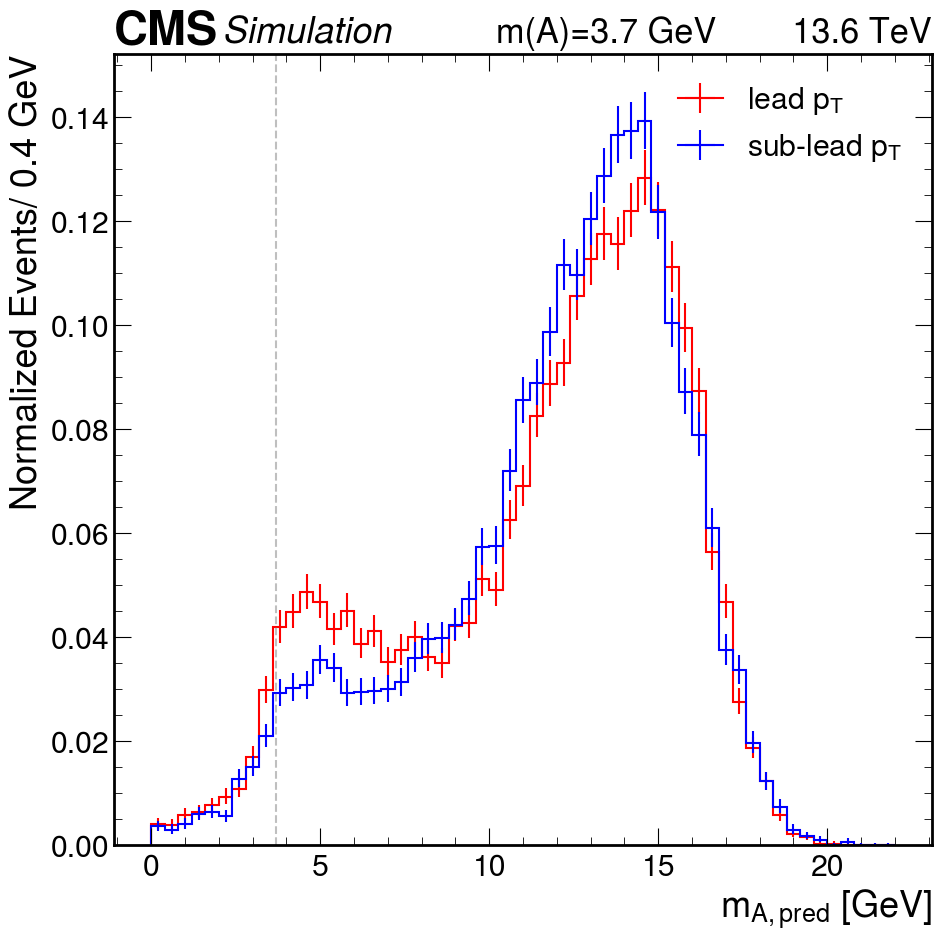

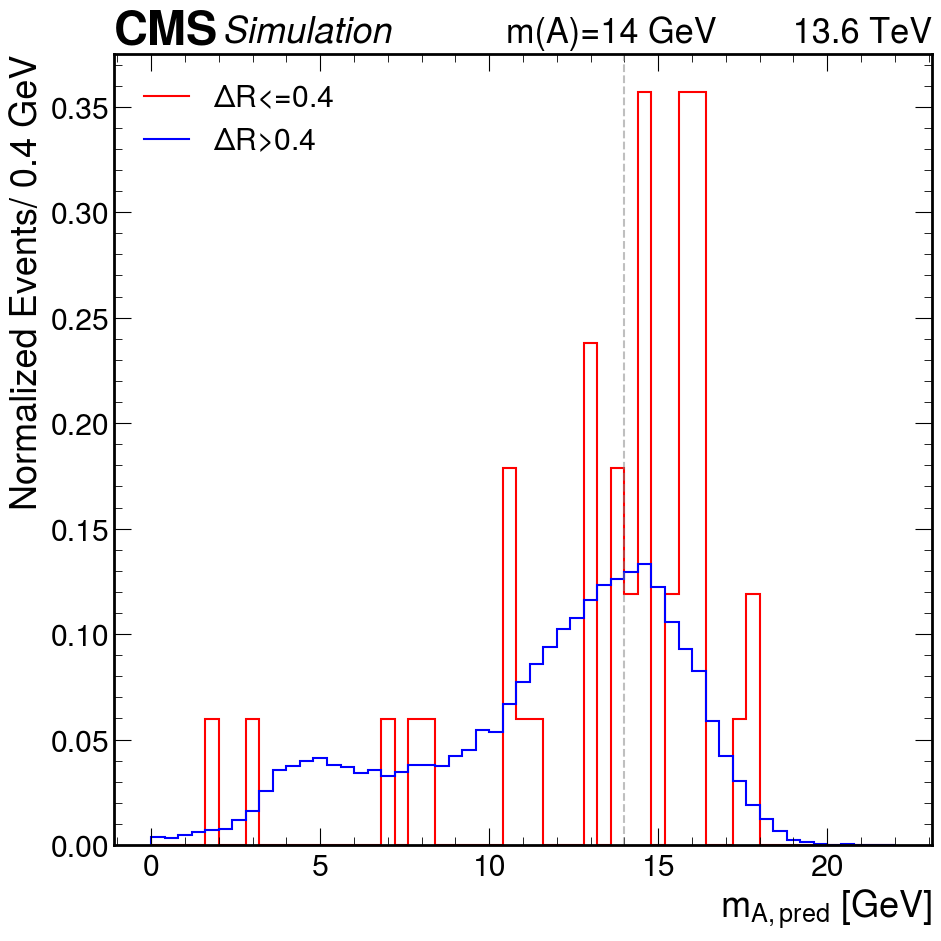

In [6]:
m0_min=0
m0_max=22.1
bin_size=0.4

fig, ax = plt.subplots(dpi=100)

h2=np.histogram(mass_A1, bins=np.arange(m0_min,m0_max,bin_size))
hep.histplot(h2, histtype='step', yerr=True, label=r'lead $p_T$', linestyle='-', color='red', density=True)

h3=np.histogram(mass_A2, bins=np.arange(m0_min,m0_max,bin_size))
hep.histplot(h3, histtype='step', yerr=True, label=r'sub-lead $p_T$', linestyle='-', color='blue', density=True)

ax.axvline(x=3.7, color="grey", linestyle="--", alpha=0.5)
ax.set_xlabel(r"$m_{A, pred}$ [GeV]")
ax.set_ylabel("Normalized Events/ 0.4 GeV")
hep.cms.label(llabel="Simulation ", rlabel= "m(A)=3.7 GeV  " +"      13.6 TeV", loc=0, ax=ax)
ax.legend()
plt.tight_layout()
# plt.savefig(f'{out_dir}/leading_subleading_A1_A2_plots_signal_mass_3p7.pdf',facecolor='w',dpi=300)


fig, ax = plt.subplots(dpi=100)

h2=np.histogram(mass_low, bins=np.arange(m0_min,m0_max,bin_size))
hep.histplot(h2, histtype='step', yerr=False, label=r'$\Delta$R<=0.4', linestyle='-', color='red', density=True)

h3=np.histogram(mass_high, bins=np.arange(m0_min,m0_max,bin_size))
hep.histplot(h3, histtype='step', yerr=False, label=r'$\Delta$R>0.4', linestyle='-', color='blue', density=True)

ax.axvline(x=14, color="grey", linestyle="--", alpha=0.5)
ax.set_xlabel(r"$m_{A, pred}$ [GeV]")
ax.set_ylabel("Normalized Events/ 0.4 GeV")
hep.cms.label(llabel="Simulation ", rlabel= "m(A)=14 GeV  " +"      13.6 TeV", loc=0, ax=ax)
ax.legend()
plt.tight_layout()
# plt.savefig(f'{out_dir}/A_plots_signal_mass_14_for_deltaR_0p4_below_and_above.pdf',facecolor='w',dpi=300)





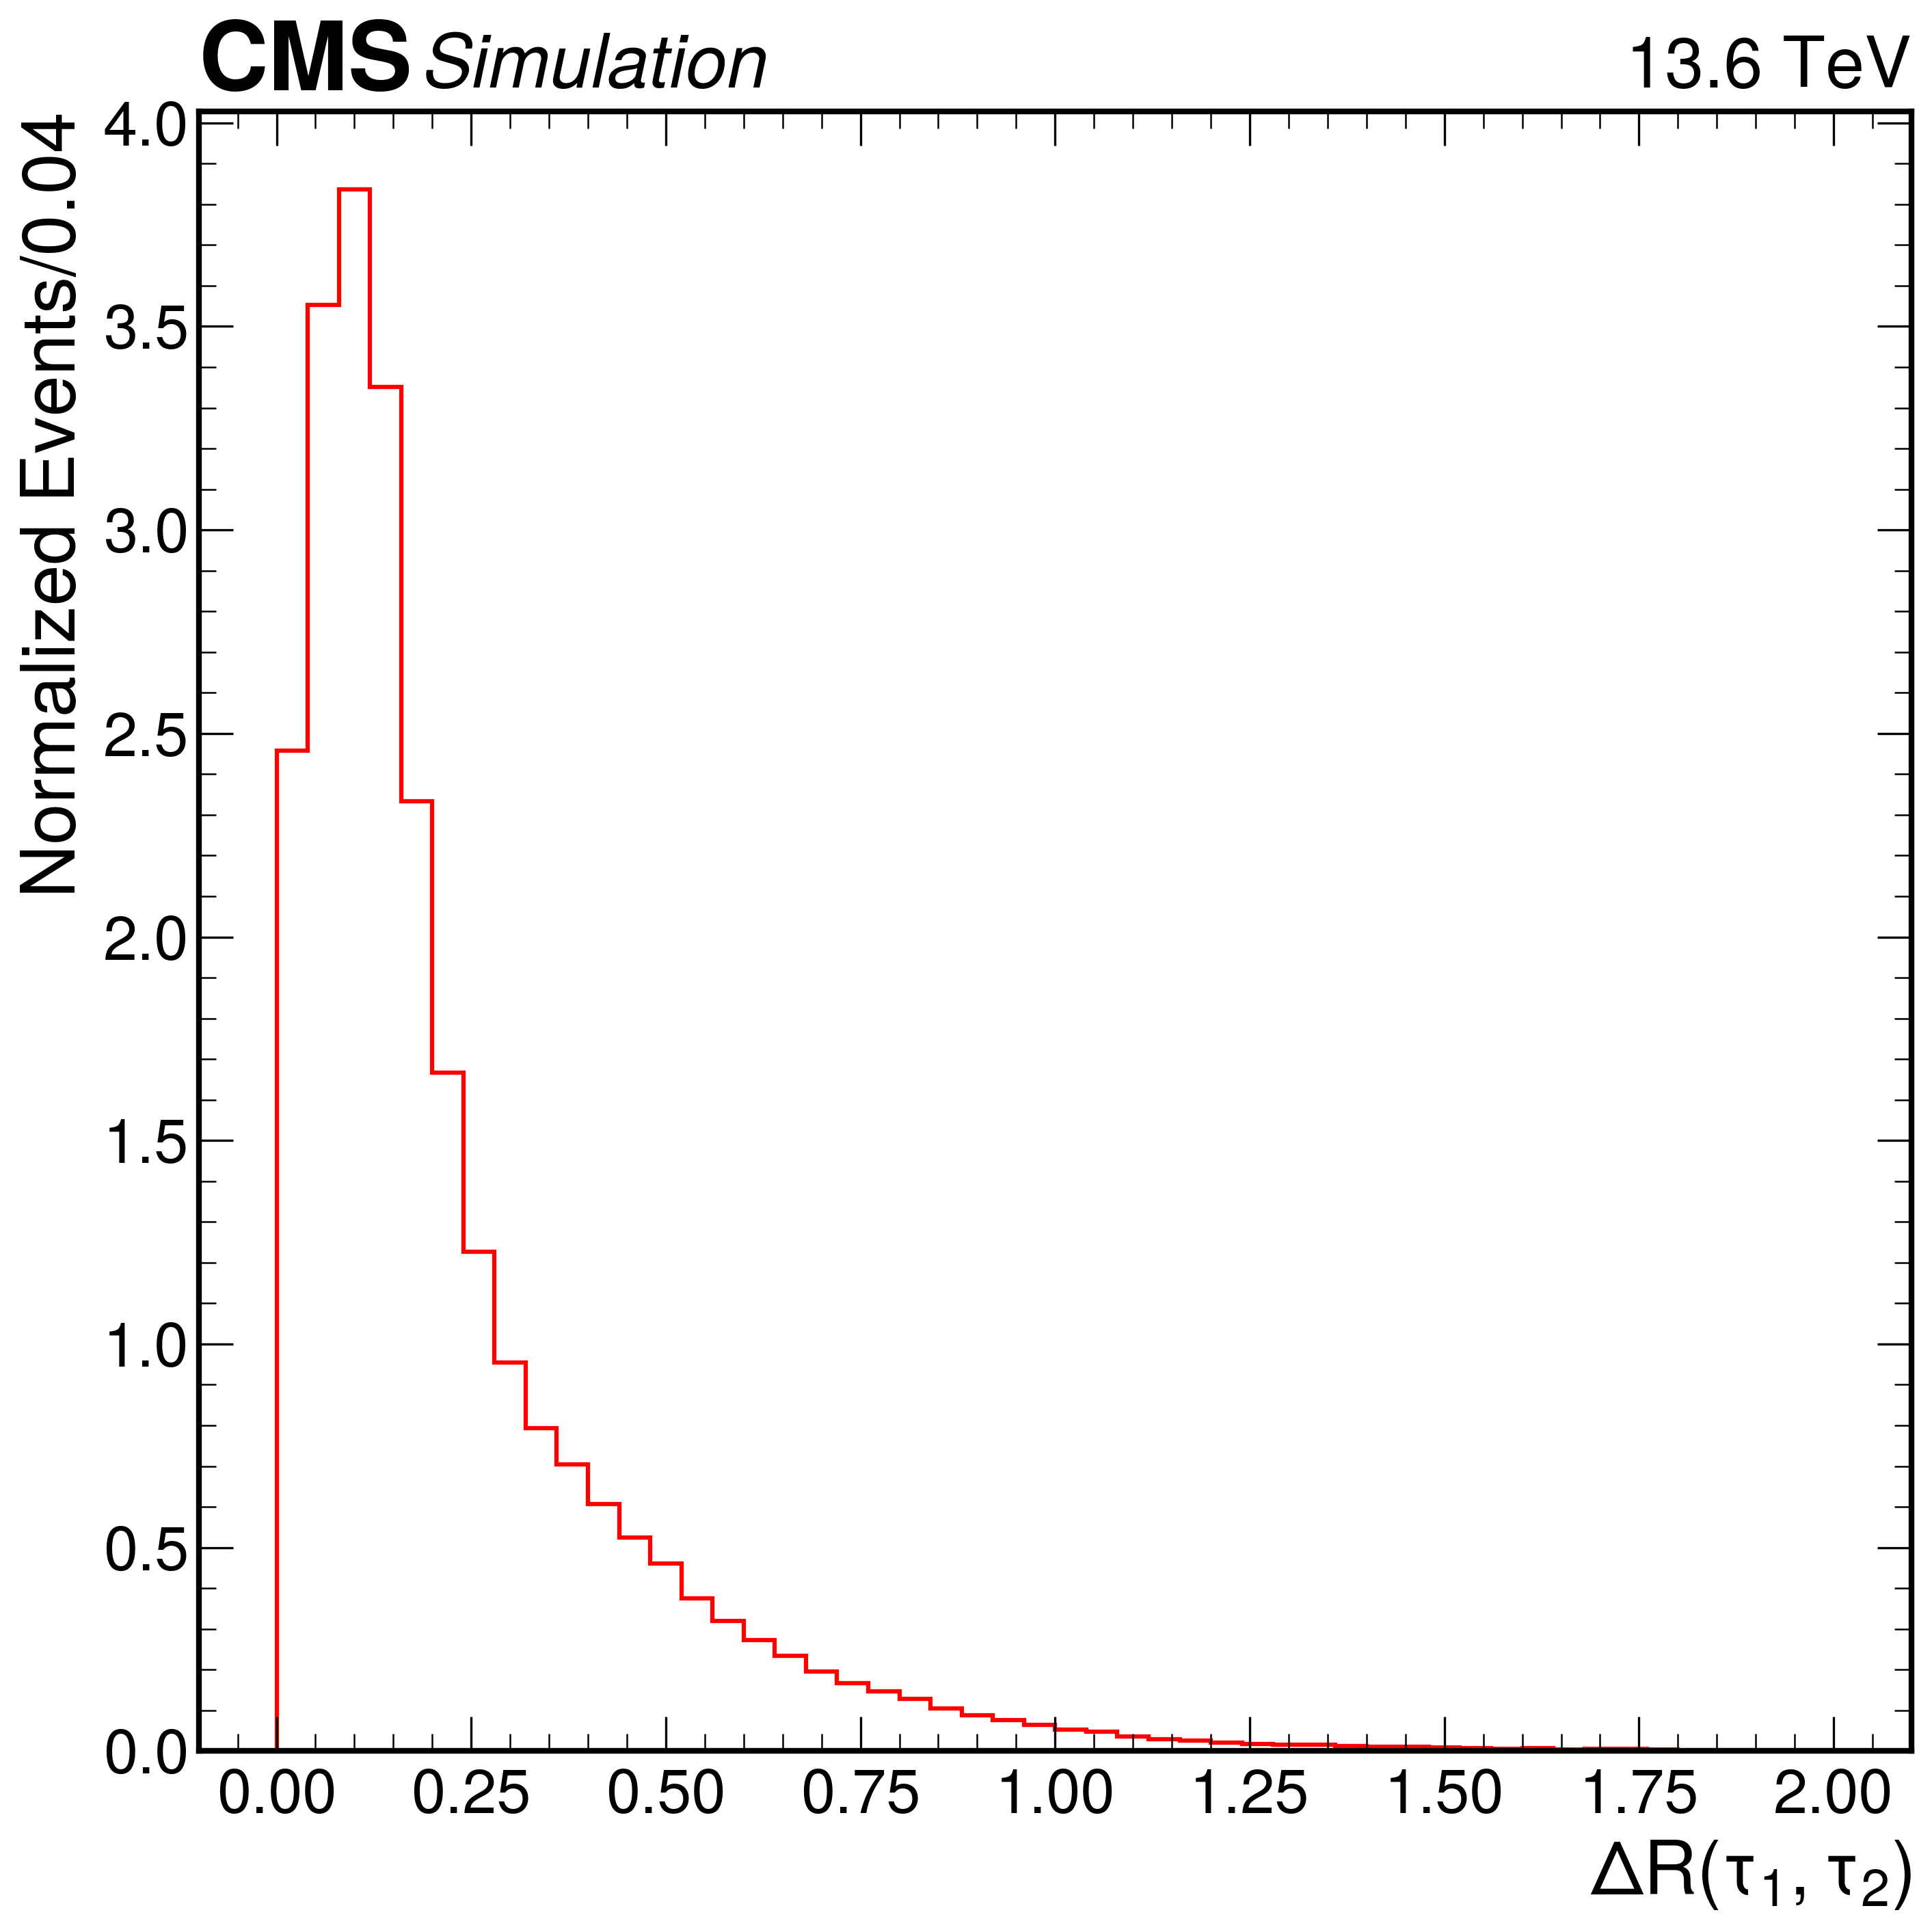

In [47]:

with open('ATo2Tau_m3p6To18_pt30To300_0009.pkl', 'rb') as f:
    out = pickle.load(f)
# print(out)
fig, ax = plt.subplots(dpi=300)
h1=out["train_mass_phy_9"]["taus_dr"].plot1d(ax=ax,histtype='step',color="r", density=True)
plt.xlabel(r"$\Delta R(\tau_1, \tau_2)$")
plt.ylabel(r"Normalized Events/0.04")
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f'{out_dir}/DeltaR_tau1_tau2_mass_regression_sample.pdf',facecolor='w',dpi=300)


In [34]:
h = out["train_mass_phy_9"]["taus_dr"]

# bin edges
edges = h.axes[0].edges
print("Bin edges:", edges)

# bin counts
values = h.values()
print("Bin values:", values)

# number of bins
n_bins = len(values)
print("Number of bins:", n_bins)

# bin centers (useful for plotting)
centers = 0.5 * (edges[1:] + edges[:-1])
print("Bin centers:", centers)

values = h.values()

# ΔR bin edges are in axis 1
dr_edges = h.axes[1].edges
dr_centers = 0.5 * (dr_edges[1:] + dr_edges[:-1])

print("ΔR bin edges:", dr_edges)
print("ΔR bin centers:", dr_centers)
print("Bin values shape:", values.shape)

Bin edges: [0. 1.]
Bin values: [[52020 75175 81183 70931 49387 35284 25971 20209 16782 14891 12844 11107
   9763  7952  6781  5777  4936  4149  3533  3111  2712  2232  1869  1600
   1355  1106  1004   769   605   556   443   363   340   319   269   214
    210   192   155   124   137   100   110   108    68    62    57    62
     53    50]]
Number of bins: 1
Bin centers: [0.5]
ΔR bin edges: [0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08
 1.12 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6  1.64
 1.68 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.  ]
ΔR bin centers: [0.02 0.06 0.1  0.14 0.18 0.22 0.26 0.3  0.34 0.38 0.42 0.46 0.5  0.54
 0.58 0.62 0.66 0.7  0.74 0.78 0.82 0.86 0.9  0.94 0.98 1.02 1.06 1.1
 1.14 1.18 1.22 1.26 1.3  1.34 1.38 1.42 1.46 1.5  1.54 1.58 1.62 1.66
 1.7  1.74 1.78 1.82 1.86 1.9  1.94 1.98]
Bin values shape: (1, 50)


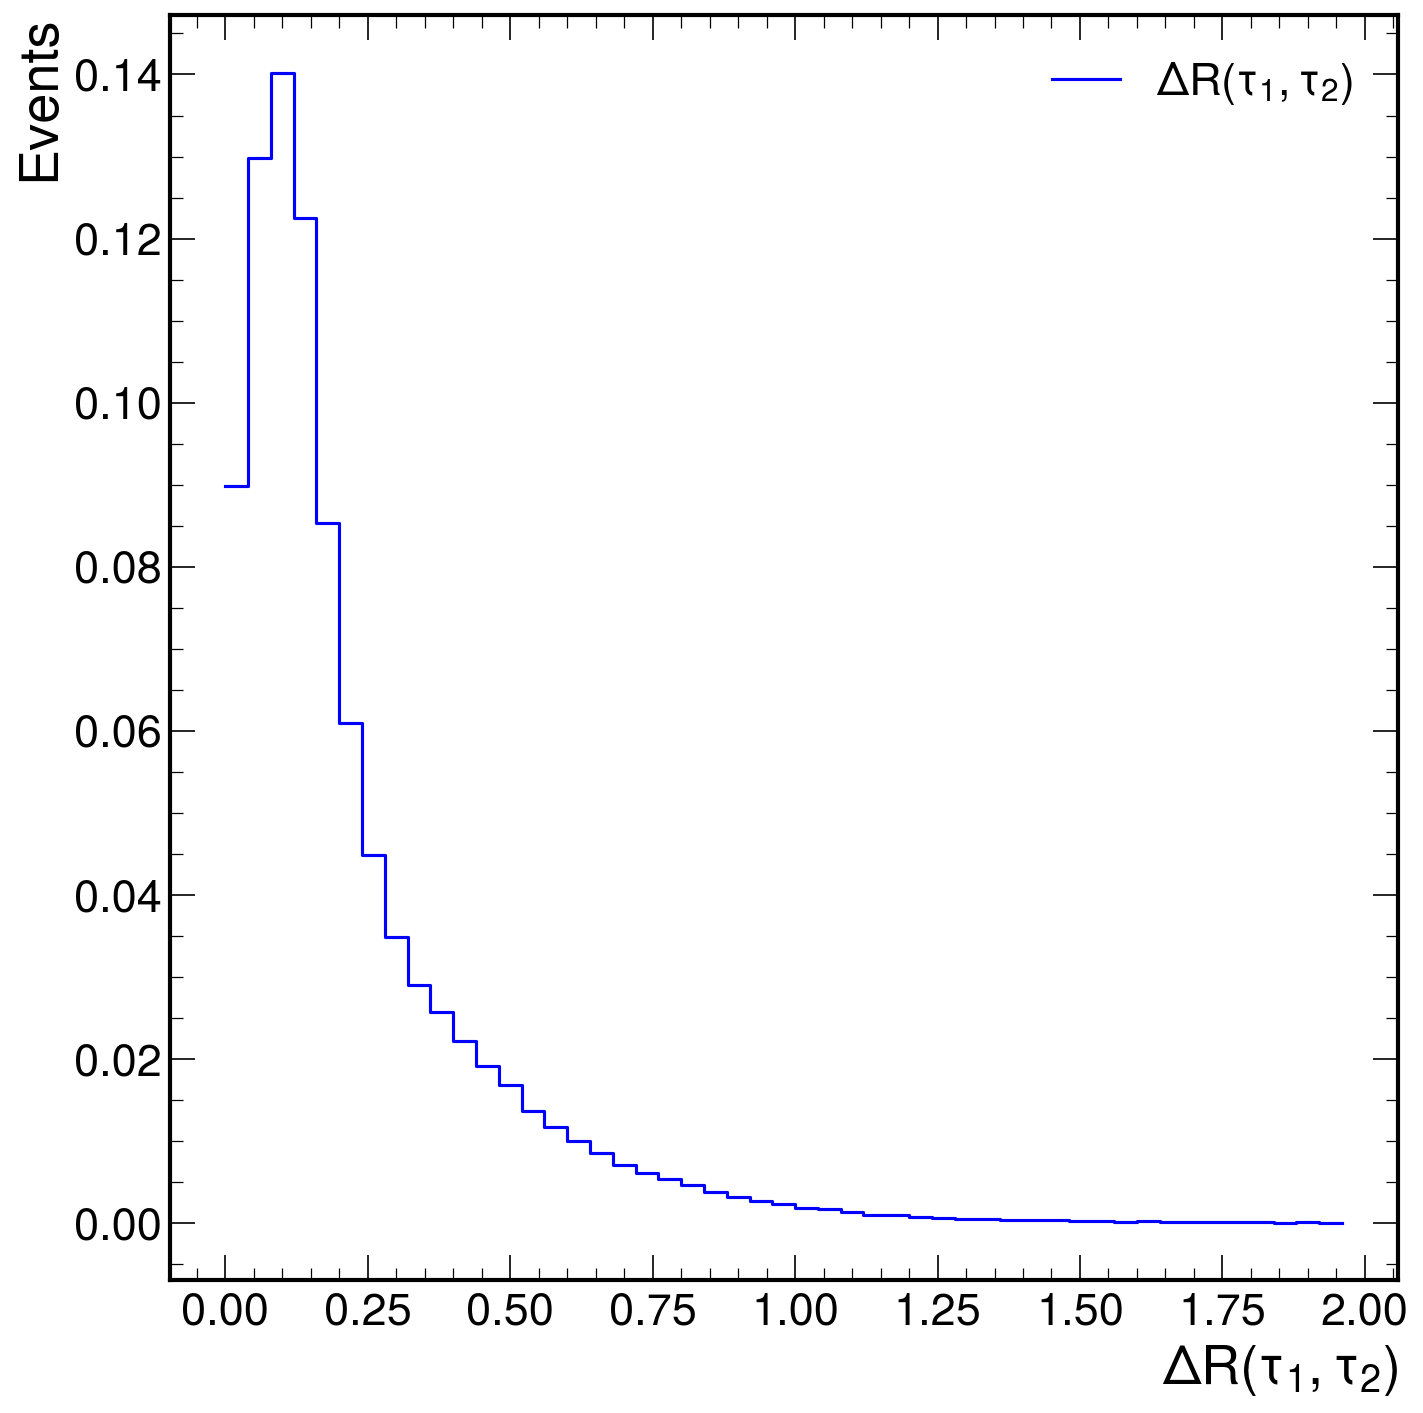

[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08
 1.12 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6  1.64
 1.68 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.  ]


In [42]:
import matplotlib.pyplot as plt

h = out["train_mass_phy_9"]["taus_dr"]

# Get ΔR bin edges and centers
dr_edges   = h.axes[1].edges
dr_centers = 0.5 * (dr_edges[1:] + dr_edges[:-1])

# Flatten the bin values (since shape is (1, N))
bin_values_ = h.values().flatten()
bin_values = bin_values_/np.max(bin_values)*(dr_edges[1]-dr_edges[0])

# Plot as histogram (step-style)
plt.figure(dpi=150)
plt.step(dr_edges[:-1], bin_values, where="post", color="blue", label=r"$\Delta R(\tau_1,\tau_2)$")
plt.xlabel(r"$\Delta R(\tau_1,\tau_2)$")
plt.ylabel("Events")
plt.legend()
plt.tight_layout()
plt.show()
print(dr_edges)

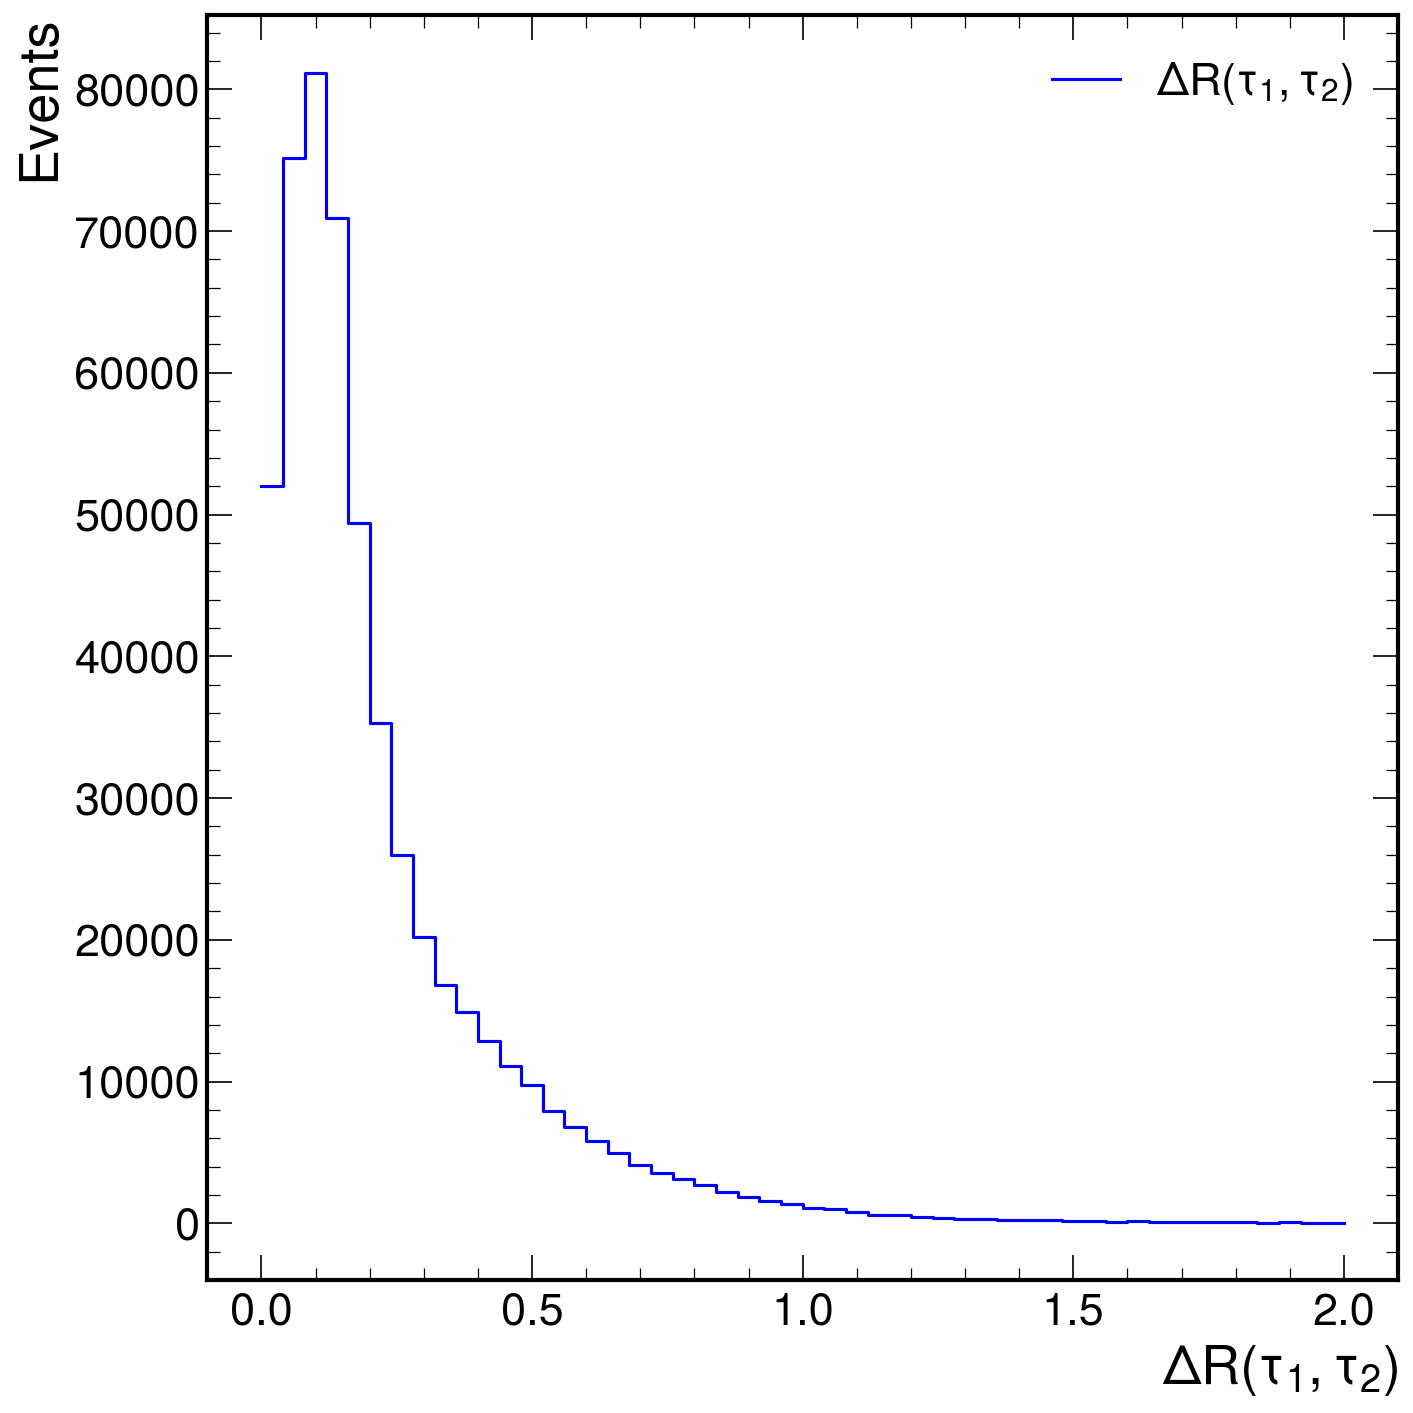

In [44]:
import numpy as np
import matplotlib.pyplot as plt

h = out["train_mass_phy_9"]["taus_dr"]

# Bin edges and values
dr_edges = h.axes[1].edges
bin_values = h.values().flatten()

# Extend y by repeating the last value
bin_values_for_plot = np.r_[bin_values, bin_values[-1]]

plt.figure(dpi=150)
plt.step(dr_edges, bin_values_for_plot, where="post",
         color="blue", label=r"$\Delta R(\tau_1,\tau_2)$")

plt.xlabel(r"$\Delta R(\tau_1,\tau_2)$")
plt.ylabel("Events")
plt.legend()
plt.tight_layout()
plt.show()


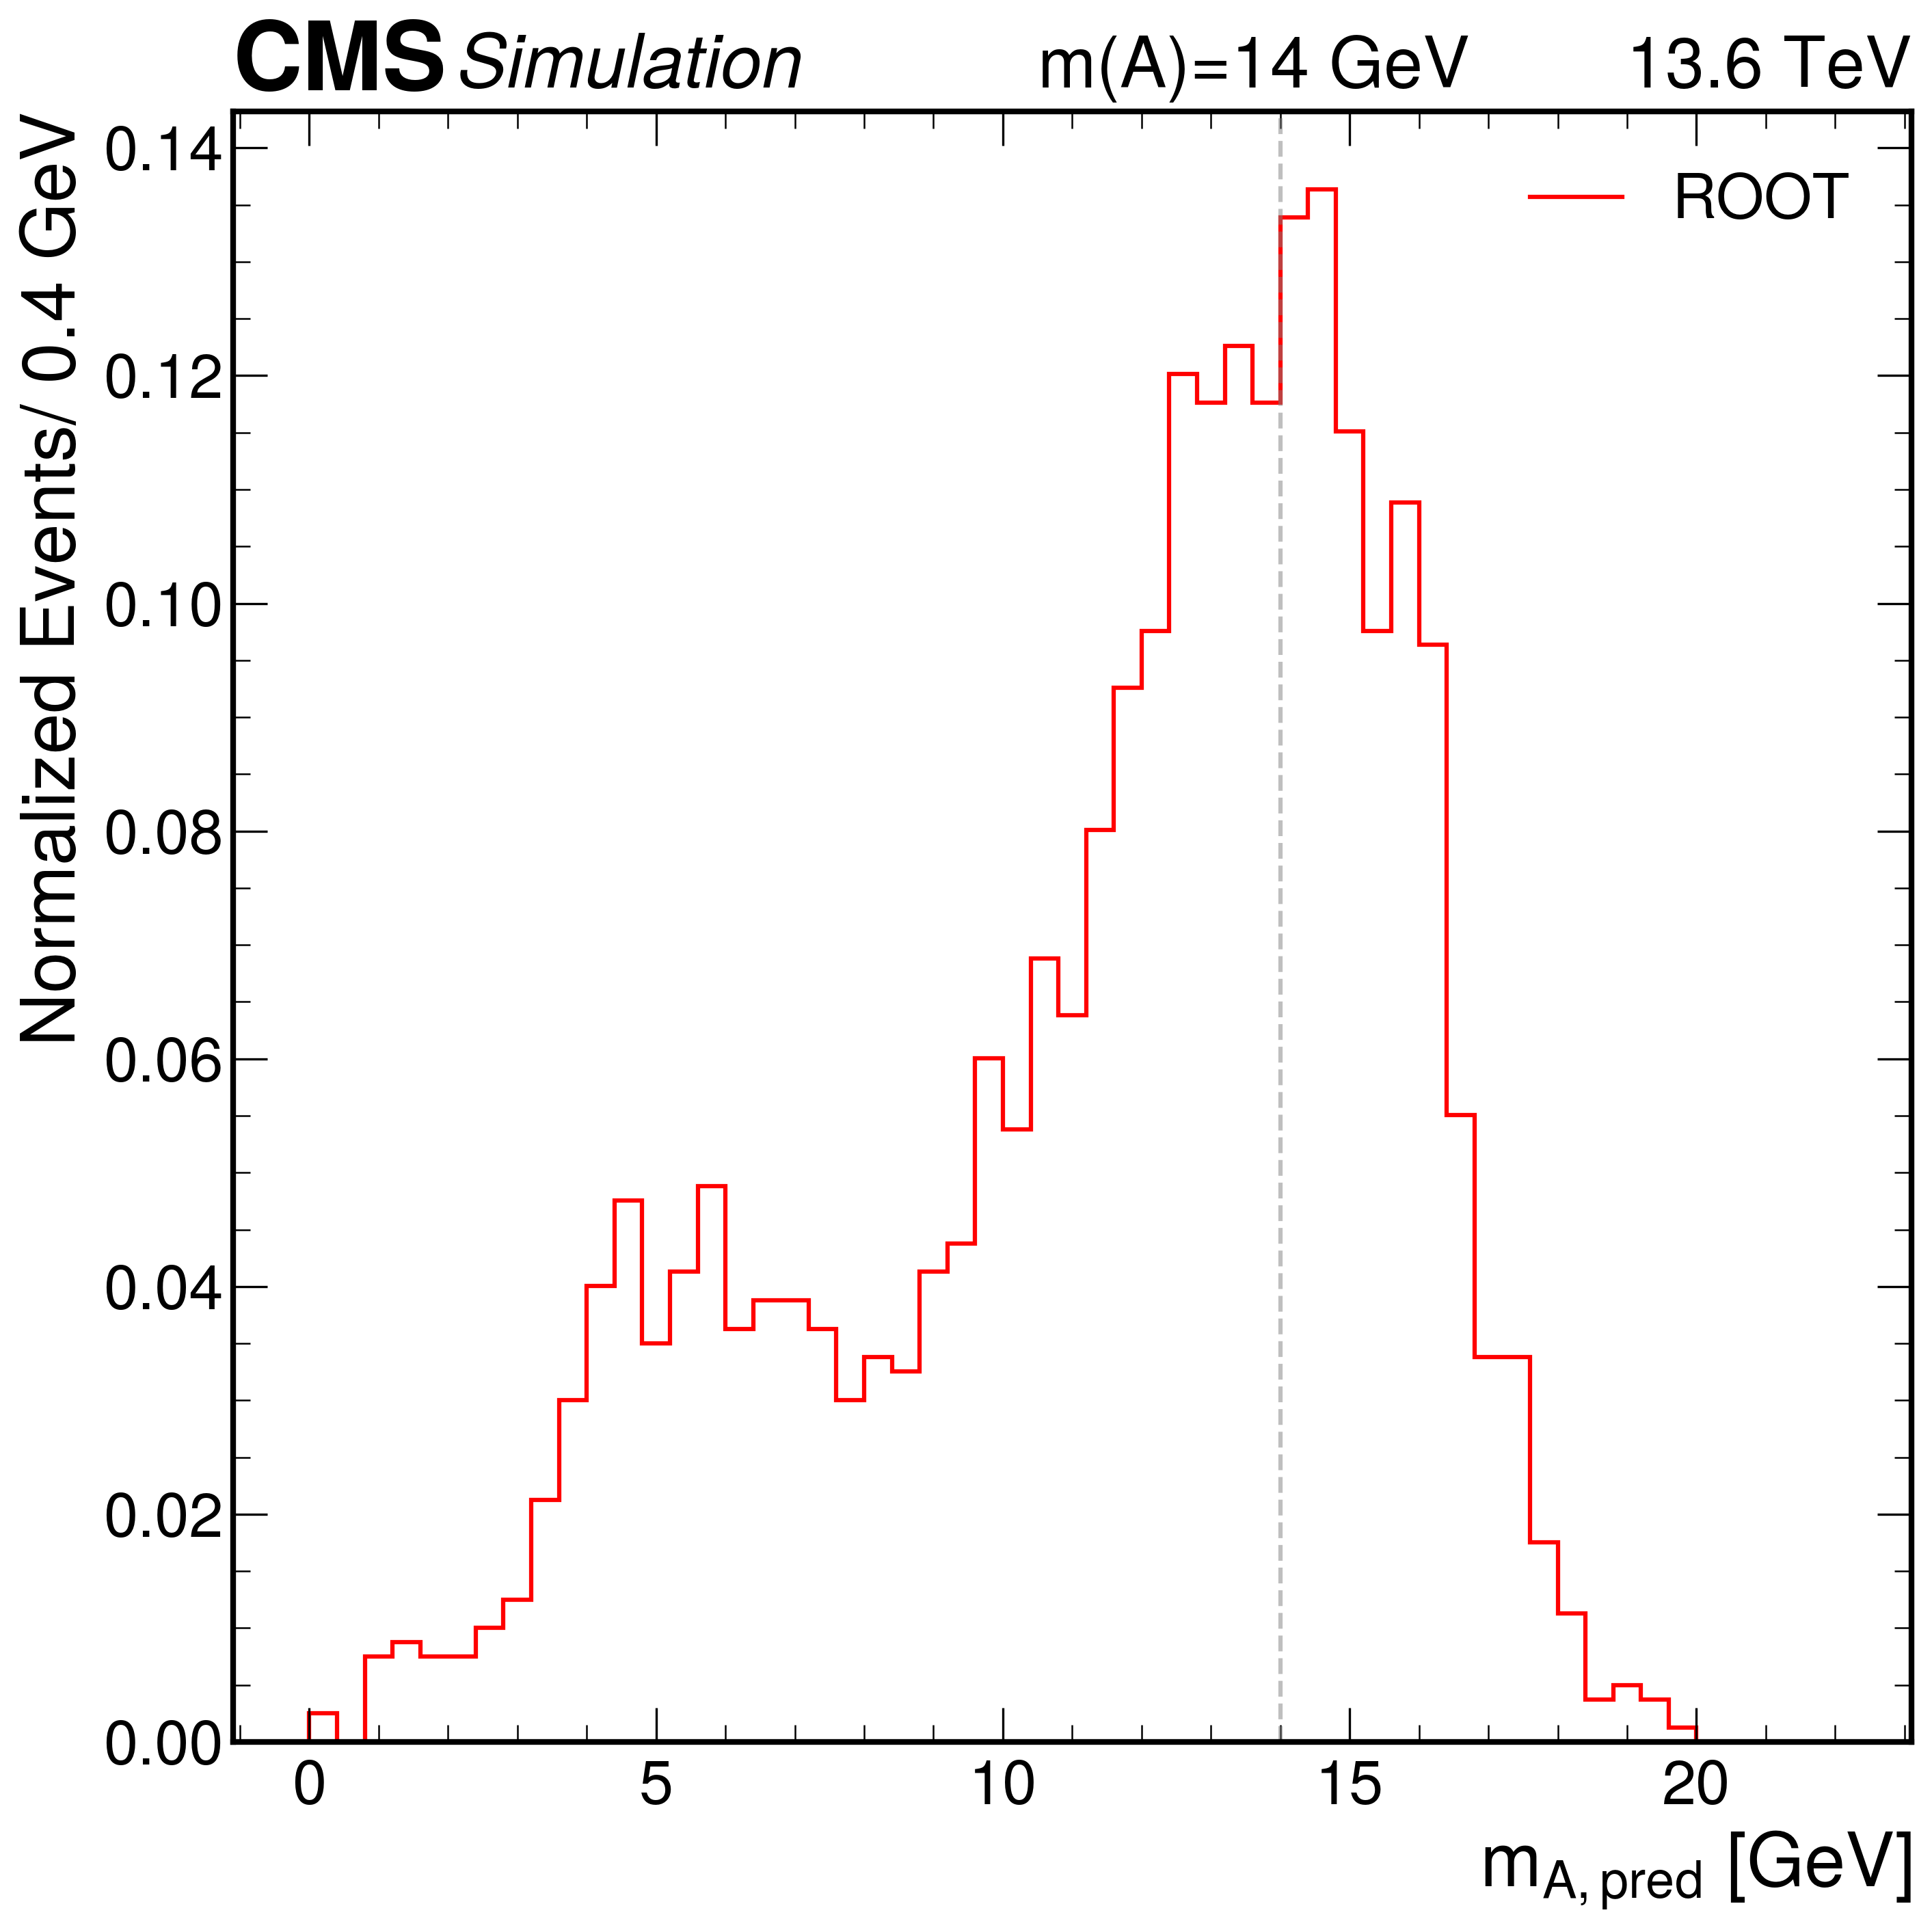

In [8]:
mass_A1, mass_A2, dr = [], [], []
m0_min=0
m0_max=22.1
bin_size=0.4
needed = ["mass_A1", "mass_A2"]
infile= glob.glob("../analysis_run3/Data_for_plots/mass_regression_test_data/*.root")[0]
for arrays in uproot.iterate(
    infile + ":fevt/RHTree",
    filter_name=needed,
    step_size=10,
    library="np"
):
    # flatten properly to 1D
    mass_A1.append(np.ravel(arrays["mass_A1"][:,0]))
    mass_A2.append(np.ravel(arrays["mass_A2"][:,1]))
   

mass_A1 = np.concatenate(mass_A1)
mass_A2 = np.concatenate(mass_A2)
mass_A1 = mass_A1[mass_A1 > -999.99]
mass_A2 = mass_A2[mass_A2 > -999.99]

mass_A=np.concatenate((mass_A1, mass_A2), axis=0) 
# print("len(mass_A1)",len(mass_A1))
# print("len(mass_A1_A2)",len(mass_A1)+len(mass_A2))
# print("len(mass_A)",len(mass_A))
fig, ax = plt.subplots(dpi=300)

h2=np.histogram(mass_A, bins=np.arange(m0_min,m0_max,bin_size))
hep.histplot(h2, histtype='step', yerr=False, label=r'ROOT', linestyle='-', color='red', density=True)

ax.axvline(x=14, color="grey", linestyle="--", alpha=0.5)
ax.set_xlabel(r"$m_{A, pred}$ [GeV]")
ax.set_ylabel("Normalized Events/ 0.4 GeV")
hep.cms.label(llabel="Simulation ", rlabel= "m(A)=14 GeV  " +"      13.6 TeV", loc=0, ax=ax)
ax.legend()
plt.tight_layout()